In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np

In [60]:
path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    df['params'] = "{"+filename.split("_{")[-1][:-4]
    li.append(df)

total_frame = pd.concat(li, axis=0, ignore_index=True)

total_frame.head()

Unnamed: 0  contributed_CCGT  contributed_Coal  contributed_Onshore  \
0           0         324652.86         223474.41         23300.555309   
1           1         229534.20         198485.92         23464.752699   
2           2         353942.46         195018.61         21601.843042   
3           3         363324.00         208966.06         23278.203832   
4           4         136551.84         146665.87         22191.845222   

   contributed_Offshore  contributed_PV  contributed_Nuclear  \
0          29579.745224     3154.551065        165604.866874   
1          29595.668288     3122.286319        165604.866874   
2          29224.130128     1658.945670        165604.866874   
3          29656.706700     3188.160175        165604.866874   
4          29595.668288     3116.600720        148459.399850   

   contributed_Recip_gas  contributed_Biomass  total_CCGT  ...  total_Onshore  \
0                8078.16                    0     31912.0  ...         8862.6   
1                1884.71                    0     31912.0  ...         8862.6   
2               12183.20                    0     31912.0  ...         8862.6   
3               13192.97                    0     31912.0  ...         8862.6   
4                   0.00                    0     31912.0  ...         8862.6   

   total_Offshore  total_PV  total_Nuclear  total_Recip_gas  Carbon_tax  \
0          6983.8    3377.8         9361.0            971.5        30.8   
1          6983.8    3377.8         9361.0            971.5        30.8   
2          6983.8    3377.8         9361.0            971.5        30.8   
3          6983.8    3377.8         9361.0            971.5        30.8   
4          6983.8    3377.8         9361.0            971.5        30.8   

   total_genco_wealth  Electricity_cost  Carbon_emitted  \
0        1.231083e+10         88.229712     1187.089907   
1        6.945128e+09         55.085872      923.771508   
2        1.603366e+10         91.280861     1191.384811   
3        3.352380e+10        110.944281     1245.402612   
4        2.049940e+10         42.642955      604.470164   

                                              params  
0  {"C": 0.1, "fit_intercept": true, "max_iter": ...  
1  {"C": 0.1, "fit_intercept": true, "max_iter": ...  
2  {"C": 0.1, "fit_intercept": true, "max_iter": ...  
3  {"C": 0.1, "fit_intercept": true, "max_iter": ...  
4  {"C": 0.1, "fit_intercept": true, "max_iter": ...  

[5 rows x 21 columns]

In [72]:
total_frame.groupby('params').Carbon_emitted.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       1009.256046
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}     970.917739
{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}         973.583506
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}      941.022025
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}         1003.615459
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}      1015.633864
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}           980.373592
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}        991.059337
Name: Carbon_emitted, dtype: float64

In [62]:
total_frame.groupby('params').Electricity_cost.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       43.283102
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    42.593877
{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        42.133633
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     41.918422
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}         42.148383
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}      42.293900
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          43.024119
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}       42.740109
Name: Electricity_cost, dtype: float64

In [63]:
results_dict = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-18-21-53-51.7447140100.csv', "rb" ) )
results_dict = pd.DataFrame.from_dict((results_dict))

In [64]:
def get_metric(results_dict, metric):
    hold_dat = {}
    for res in results_dict:
        hold_frame = []
        for i in range(len(results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'])):
             hold_frame.append(results_dict[res][i][metric])
        hold_dat[res] = hold_frame

    results_df = pd.DataFrame(hold_dat)
    return results_df

In [65]:
results_metrics = get_metric(results_dict, "median_absolute_error")
results_metrics

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}  \
0                                         7423.690230                                  
1                                         7379.767508                                  
2                                         7366.851765                                  
3                                         7343.025700                                  
4                                         7398.655240                                  
5                                         7359.671845                                  
6                                         7365.675365                                  
7                                         7379.748319                                  
8                                         7423.467462                                  
9                                         7494.792199                                  
10                                        7545.942184                                  
11                                        7644.281954                                  
12                                        7711.686590                                  
13                                        7800.350139                                  
14                                        7893.203731                                  
15                                        7821.177725                                  
16                                        7815.504970                                  
17                                        7778.499363                                  
18                                        7732.663691                                  
19                                        7836.755861                                  
20                                        7930.390984                                  
21                                        8021.750427                                  
22                                        8043.905625                                  
23                                        8041.736197                                  

    {"C": 0.1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}  \
0                                         7423.690230                                   
1                                         7379.767508                                   
2                                         7366.851765                                   
3                                         7343.025700                                   
4                                         7398.655240                                   
5                                         7359.671845                                   
6                                         7365.675365                                   
7                                         7379.748319                                   
8                                         7423.467462                                   
9                                         7494.792199                                   
10                                        7545.942184                                   
11                                        7644.281954                                   
12                                        7711.686590                                   
13                                        7800.350139                                   
14                                        7893.203731                                   
15                                        7821.177725                                   
16                                        7815.504970                                   
17                                        7778.499363                                   
18                                        7732.663691                                   
19                     

In [66]:
results_metrics.mean()

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}       7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 100, "shuffle": false, "tol": 0.001}      7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     7648.049795
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 10, "shuffle": false, "tol": 0.001}      9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 100, "shuffle": false, "tol": 0.001}     9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    9503.368829
{"C": 1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          1553.981700
{"C": 1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}         1553.981700


In [70]:
joined_df = total_frame.set_index('params').join(results_metrics.mean().to_frame())
joined_df.head()

Unnamed: 0  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...           0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           1   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           2   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           3   
{"C": 0.1, "fit_intercept": false, "max_iter": ...           4   

                                                    contributed_CCGT  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...         306932.70   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         214244.28   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         343491.60   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         345568.80   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         142010.94   

                                                    contributed_Coal  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...         239410.29   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         216939.53   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         204808.29   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         228578.60   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         142412.51   

                                                    contributed_Onshore  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...         23300.555309   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         23464.752699   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         21601.843042   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         23278.203832   
{"C": 0.1, "fit_intercept": false, "max_iter": ...         22191.845222   

                                                    contributed_Offshore  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29579.745224   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29595.668288   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29224.130128   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29656.706700   
{"C": 0.1, "fit_intercept": false, "max_iter": ...          29595.668288   

                                                    contributed_PV  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3154.551065   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3122.286319   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     1658.945670   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3188.160175   
{"C": 0.1, "fit_intercept": false, "max_iter": ...     3116.600720   

                                                    contributed_Nuclear  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        165604.866874   
{"C": 0.1, "fit_intercept": false, "max_iter": ...        148459.399850   

                                                    contributed_Recip_gas  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...               10447.87   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                1884.71   
{"C": 0.1, "fit_intercept": false, "max_iter": ...               13135.74   
{"C": 0.1, "fit_intercept": false, "max_iter": ...               13192.97   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                   0.00   

                                                    contributed_Biomass  \
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   
{"C": 0.1, "fit_intercept": false, "max_iter": ...                    0   

                                                    total_CCGT  ...  \
{"C": 0.1, "fit_intercep

correlations = joined_df.groupby(joined_df.index).Carbon_emitted.mean()

correlations = pd.concat([joined_df.groupby(joined_df.index).Carbon_emitted.mean(), results_metrics.mean()], axis=1).reset_index()
correlations = correlations.dropna()
correlations = correlations.rename({0: "absolute_median_error"}, axis=1)

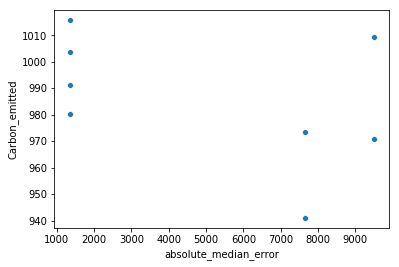

In [84]:
sns.scatterplot(data = correlations, y="Carbon_emitted", x="absolute_median_error")

# Visualise results

In [118]:
results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'].iloc[0]

{'median_absolute_error': 7423.690230130251,
 'mean_squared_error': 280592024.0511837,
 'mean_absolute_error': 12346.327822366233,
 'root_mean_squared_error': 16750.88129177637}

In [116]:
def get_results_mean(error_metric, output_metric):
#     total_frame.groupby('params')[error_metric].mean()

    correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
    results_metrics = get_metric(results_dict, error_metric)
    results_metrics
    
    correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric].mean(), results_metrics.mean()], axis=1).reset_index()
    correlations = correlations.dropna()
    correlations = correlations.rename({0: error_metric}, axis=1)
    
    sns.scatterplot(data = correlations, x= error_metric, y=output_metric)
    plt.show()
    plt.close()
    
    return correlations

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


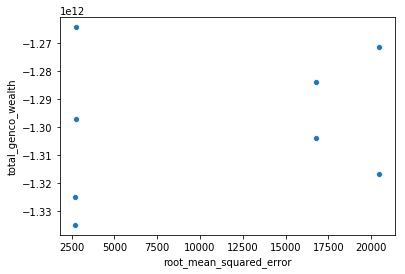

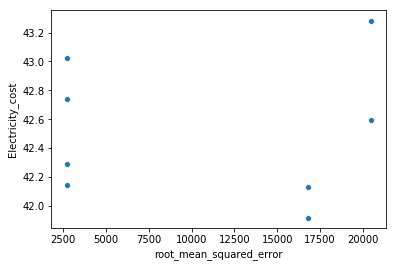

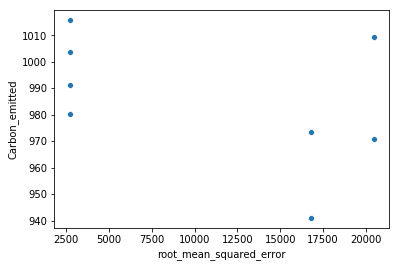

In [117]:
for output_metric in ['total_genco_wealth', 'Electricity_cost', 'Carbon_emitted']:
    get_results_mean('root_mean_squared_error', output_metric)

In [130]:
# def get_results_over_time(error_metric, output_metric):

#     correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
#     results_metrics = get_metric(results_dict, error_metric)
#     results_metrics
    
#     correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric], results_metrics.mean()], axis=1).reset_index()
#     correlations = correlations.dropna()
#     correlations = correlations.rename({0: error_metric}, axis=1)
    
#     sns.scatterplot(data = correlations, x= error_metric, y=output_metric)
#     plt.show()
#     plt.close()
    
#     return correlations


# joined_df.columns.str.contains("contributed_")
joined_df.reset_index()

index  Unnamed: 0  \
0      {"C": 0.1, "fit_intercept": false, "max_iter":...           0   
1      {"C": 0.1, "fit_intercept": false, "max_iter":...           1   
2      {"C": 0.1, "fit_intercept": false, "max_iter":...           2   
3      {"C": 0.1, "fit_intercept": false, "max_iter":...           3   
4      {"C": 0.1, "fit_intercept": false, "max_iter":...           4   
...                                                  ...         ...   
80507  {"C": 2, "fit_intercept": true, "max_iter": 10...         131   
80508  {"C": 2, "fit_intercept": true, "max_iter": 10...         132   
80509  {"C": 2, "fit_intercept": true, "max_iter": 10...         133   
80510  {"C": 2, "fit_intercept": true, "max_iter": 10...         134   
80511  {"C": 2, "fit_intercept": true, "max_iter": 10...         135   

       contributed_CCGT  contributed_Coal  contributed_Onshore  \
0             306932.70         239410.29         23300.555309   
1             214244.28         216939.53         23464.752699   
2             343491.60         204808.29         21601.843042   
3             345568.80         228578.60         23278.203832   
4             142010.94         142412.51         22191.845222   
...                 ...               ...                  ...   
80507         153206.13              0.00         41540.230639   
80508              0.00              0.00         36892.619441   
80509         127812.30              0.00         38836.848554   
80510              0.00              0.00         37881.063167   
80511              0.00              0.00         38381.474061   

       contributed_Offshore  contributed_PV  contributed_Nuclear  \
0              29579.745224    3.154551e+03        165604.866874   
1              29595.668288    3.122286e+03        165604.866874   
2              29224.130128    1.658946e+03        165604.866874   
3              29656.706700    3.188160e+03        165604.866874   
4              29595.668288    3.116601e+03        148459.399850   
...                     ...             ...                  ...   
80507          24101.397381    2.043556e+06        454940.888444   
80508          21077.092863    7.880563e+05        377402.983188   
80509          21918.526493    2.454386e+06        455712.655597   
80510          21429.626605    1.241776e+06        323550.294889   
80511          21753.868313    1.615099e+06        329404.520990   

       contributed_Recip_gas  contributed_Biomass  ...  total_Onshore  \
0                   10447.87                    0  ...         8862.6   
1                    1884.71                    0  ...         8862.6   
2                   13135.74                    0  ...         8862.6   
3                   13192.97                    0  ...         8862.6   
4                       0.00                    0  ...         8862.6   
...                      ...                  ...  ...            ...   
80507                   0.00                    0  ...        17876.2   
80508                   0.00                    0  ...        17876.2   
80509                   0.00                    0  ...        17876.2   
80510                   0.00                    0  ...        17876.2   
80511                   0.00                    0  ...        17876.2   

       total_Offshore  total_PV  total_Nuclear  total_Recip_gas  Carbon_tax  \
0              6983.8    3377.8         9361.0            971.5        30.8   
1              6983.8    3377.8         9361.0            971.5        30.8   
2              6983.8    3377.8         9361.0            971.5        30.8   
3              6983.8    3377.8         9361.0            971.5        30.8   
4              6983.8    3377.8         9361.0            971.5        30.8   
...               ...       ...            ...              ...         ...   
80507          6979.5  816177.8        42361.0              0.0        87.9   
80508          6979.5  816177.8        42361.0              0.0    

{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


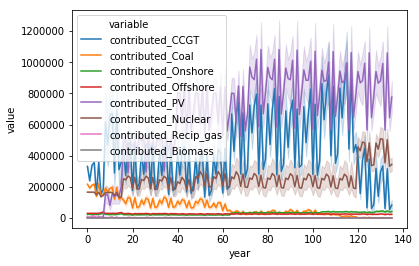

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


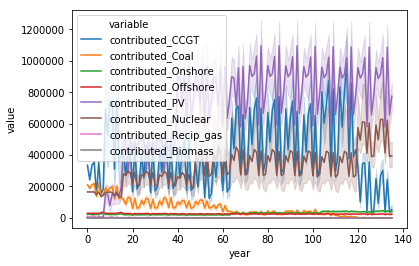

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


KeyboardInterrupt: 

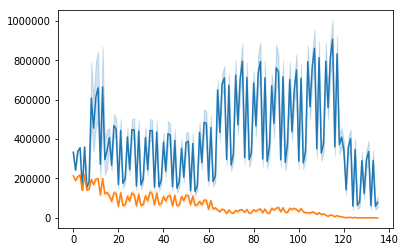

In [153]:
joined_df_long = joined_df.reset_index().filter(regex="contributed_|Unnamed|index").melt(id_vars=['Unnamed: 0', 'index'])
joined_df_long = joined_df_long.rename({"Unnamed: 0":"year"}, axis=1)
joined_df_long
# g = sns.FacetGrid(data = joined_df_long, col='index')
# g.map(sns.lineplot, x="year", hue='variable', y='value')
# joined_df_long
for name, df in joined_df_long.groupby('index'):
    print(name)
    sns.lineplot(data=pd.DataFrame(df), x='year', hue='variable', y='value')
    plt.show()
    plt.close()

In [168]:
def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df

def get_average_per_year_cleaned(results_df):
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

#     if year_to_compare is not None:
#         # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
#         results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    return joined

In [ ]:
averaged_df = total_frame.reset_index().groupby('params').apply(get_average_per_year_cleaned)
averaged_df

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 0)


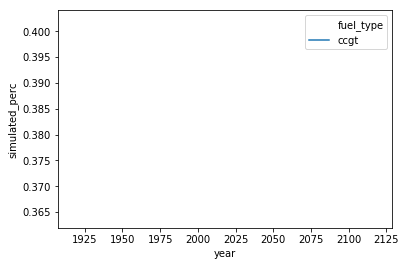

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 1)


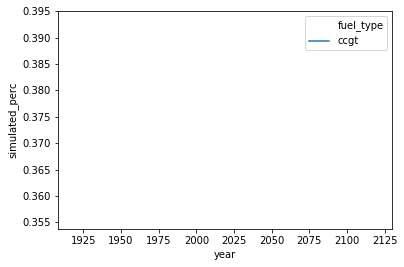

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 2)


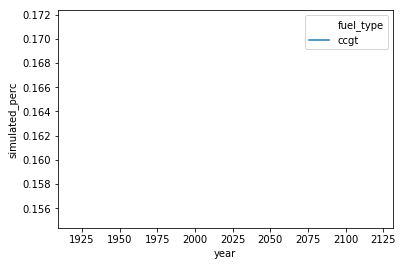

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 3)


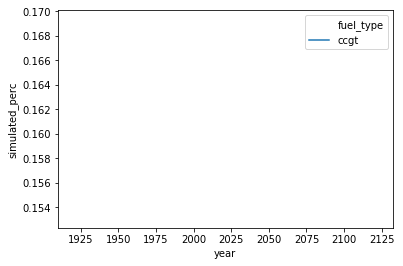

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 4)


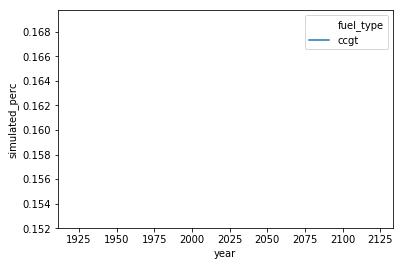

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 5)


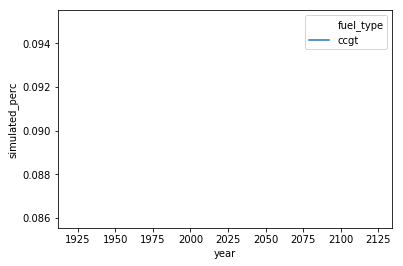

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 6)


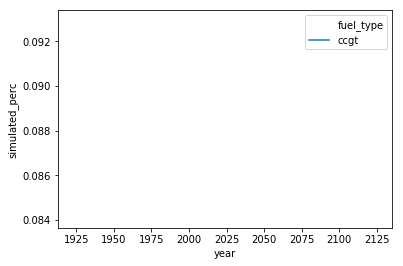

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 7)


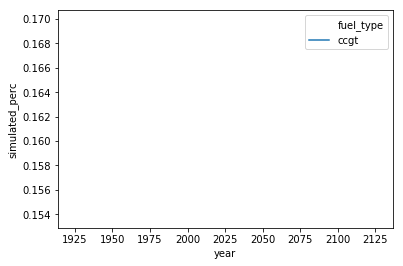

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 8)


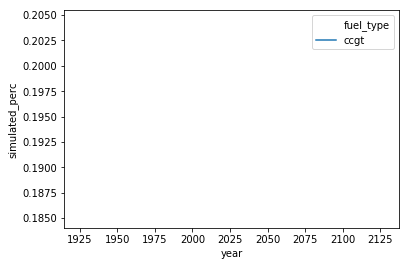

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 9)


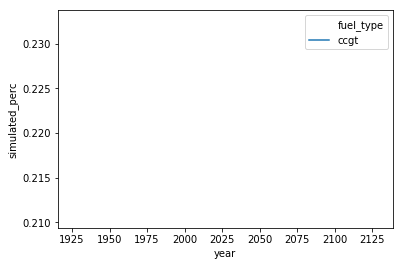

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 10)


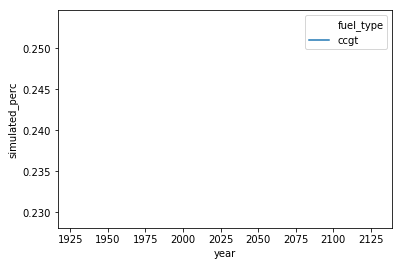

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 11)


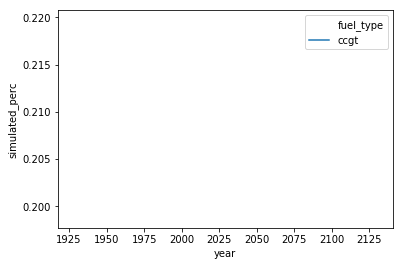

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 12)


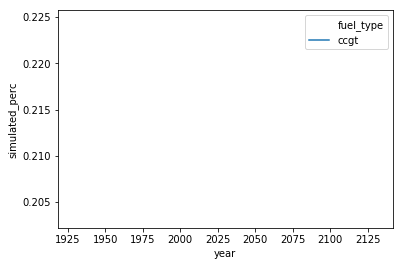

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 13)


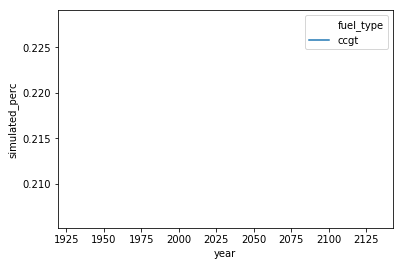

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 14)


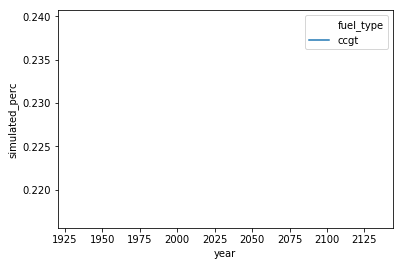

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 15)


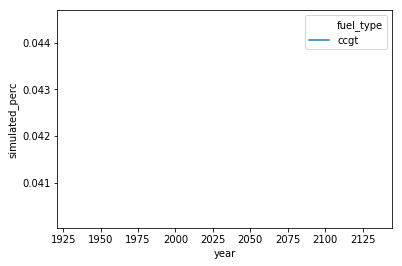

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 16)


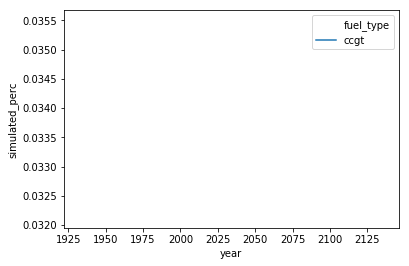

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 17)


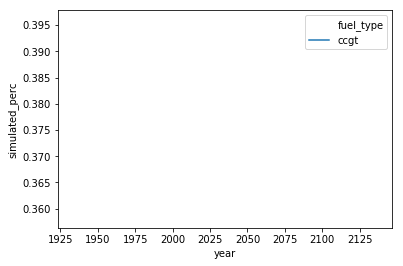

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 18)


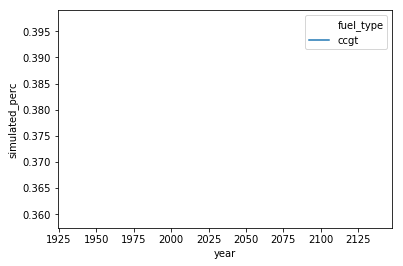

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 19)


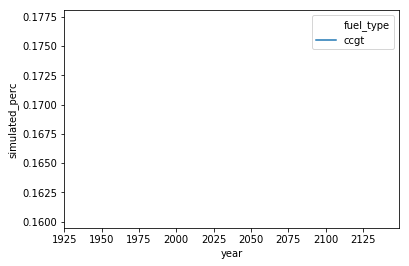

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 20)


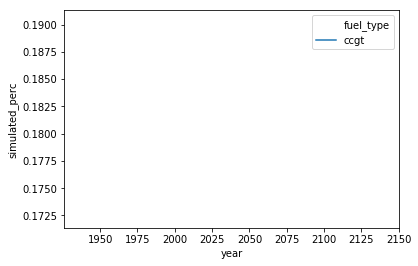

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 21)


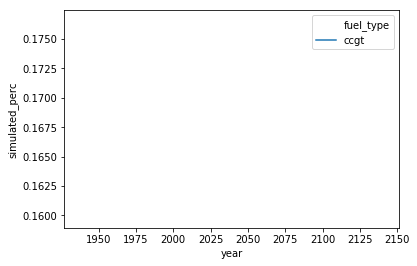

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 22)


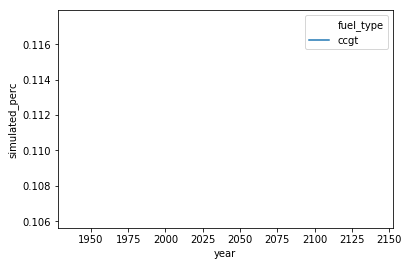

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 23)


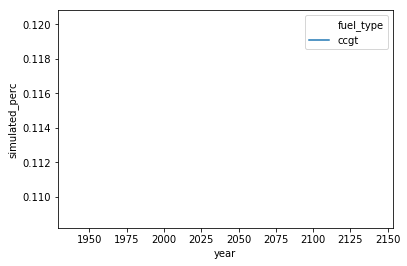

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 24)


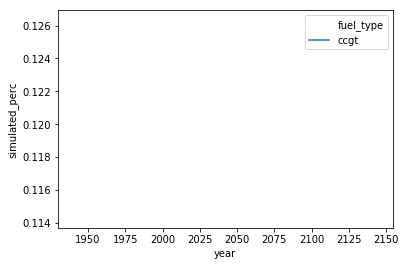

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 25)


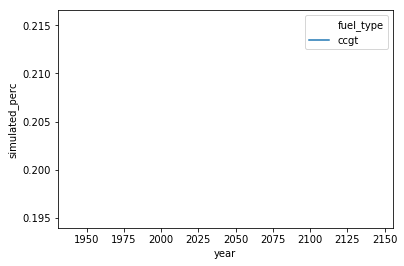

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 26)


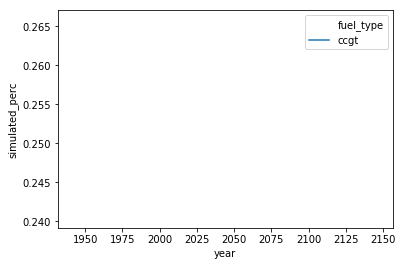

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 27)


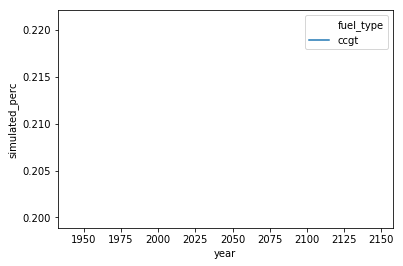

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 28)


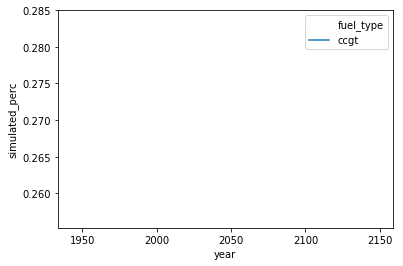

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 29)


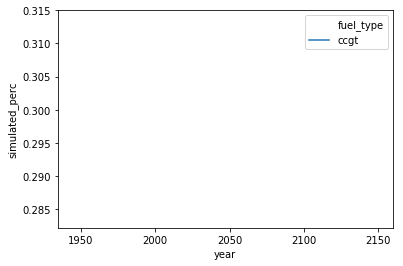

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 30)


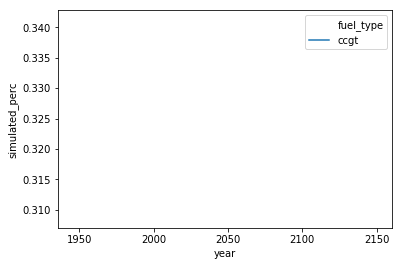

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 31)


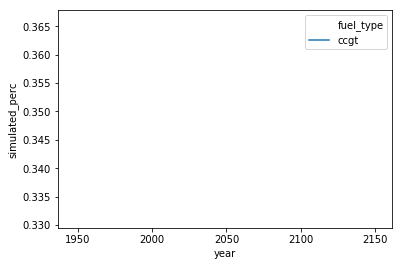

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 32)


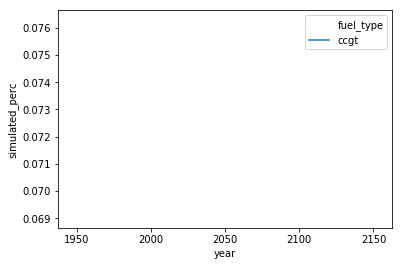

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 33)


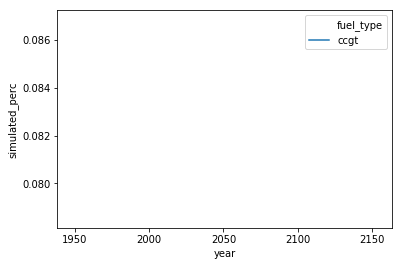

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 34)


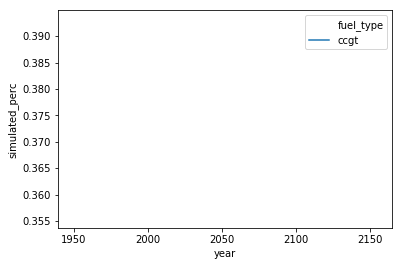

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 35)


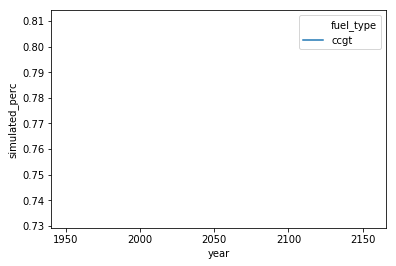

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 36)


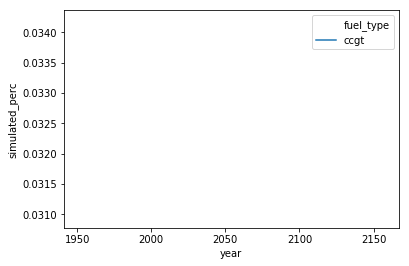

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 37)


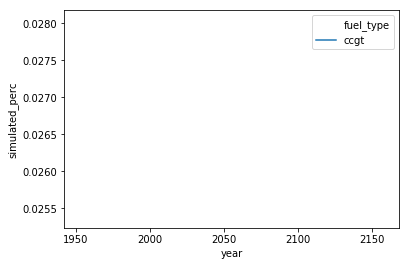

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 38)


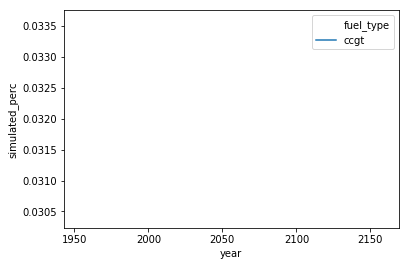

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 39)


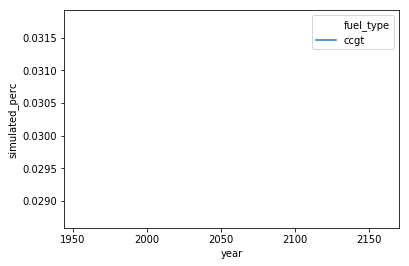

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 40)


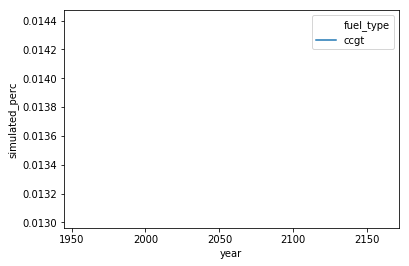

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 41)


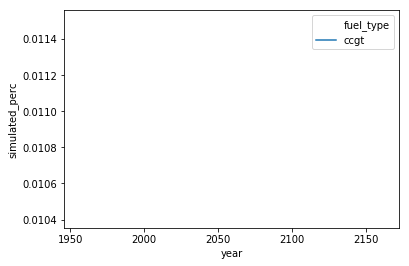

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 42)


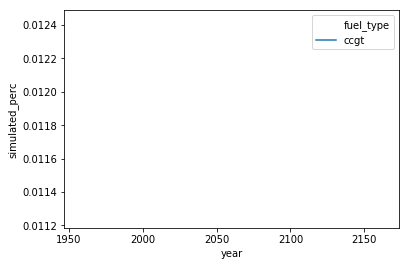

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 43)


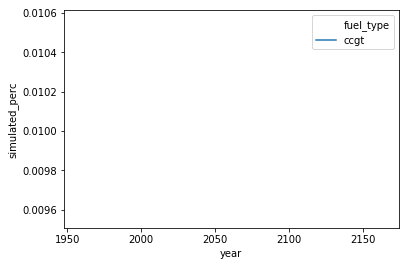

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 44)


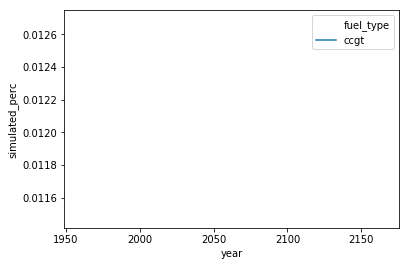

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 45)


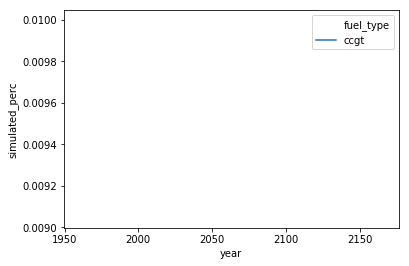

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 46)


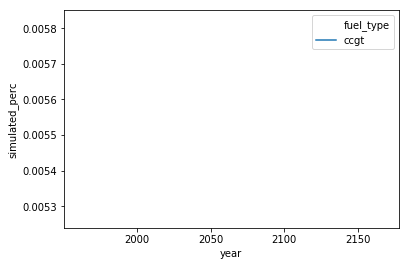

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 47)


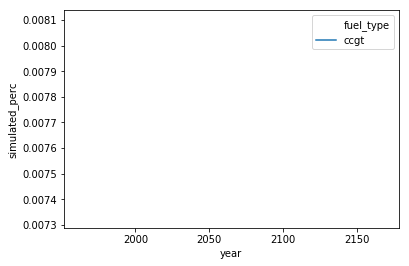

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 48)


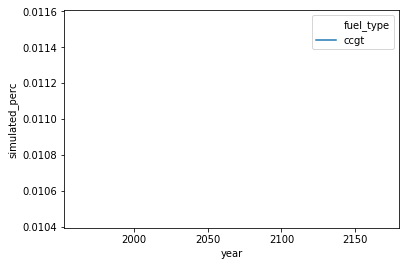

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 49)


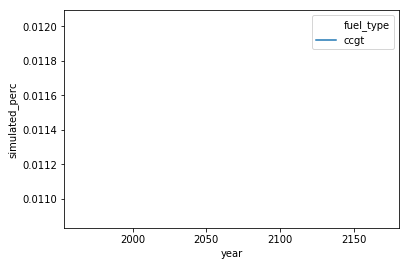

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 50)


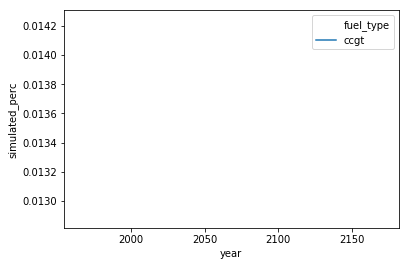

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 51)


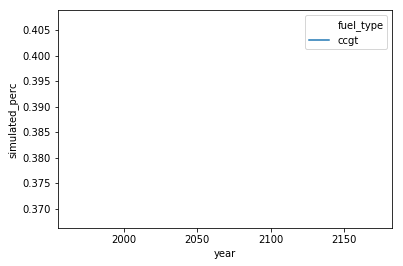

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 52)


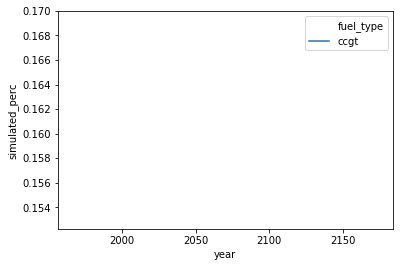

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 53)


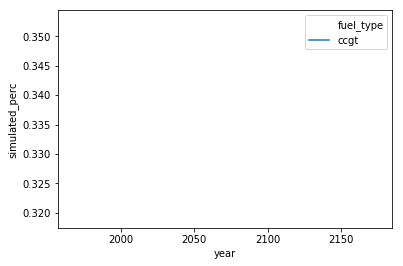

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 54)


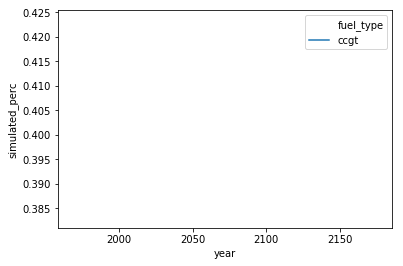

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 55)


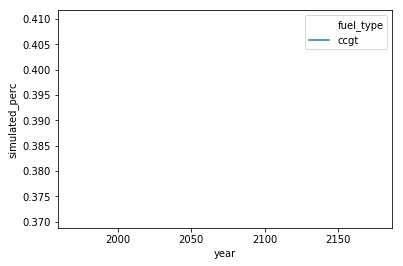

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 56)


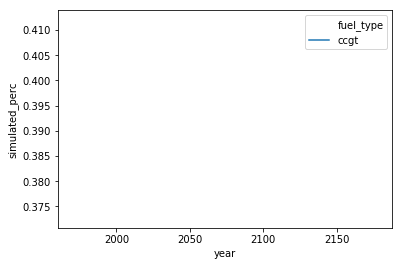

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 57)


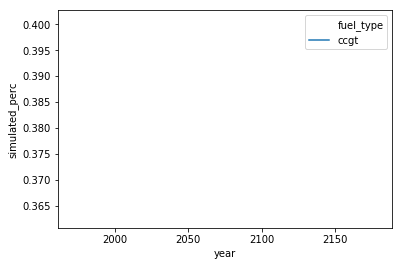

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 58)


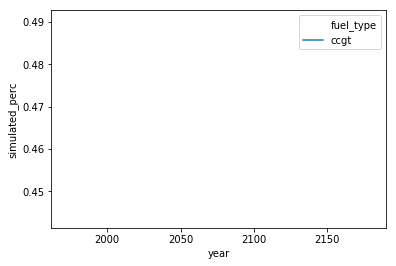

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 59)


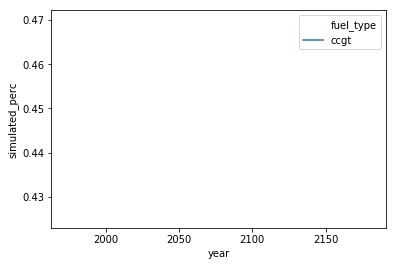

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 60)


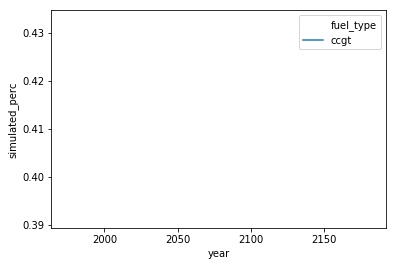

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 61)


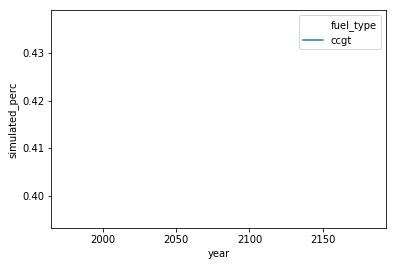

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 62)


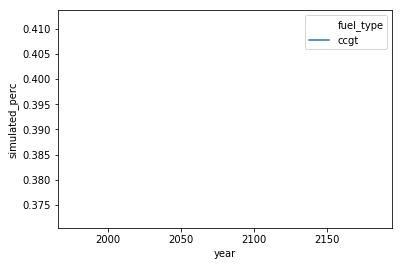

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 63)


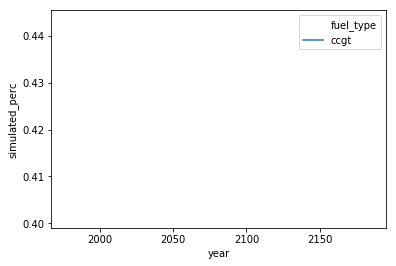

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 64)


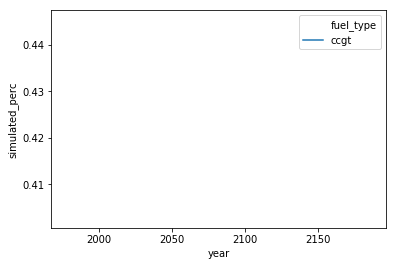

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 65)


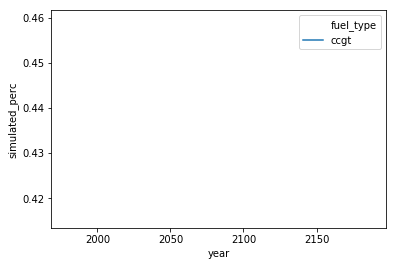

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 66)


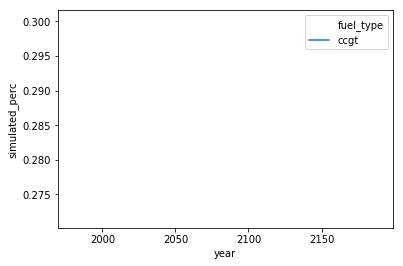

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 67)


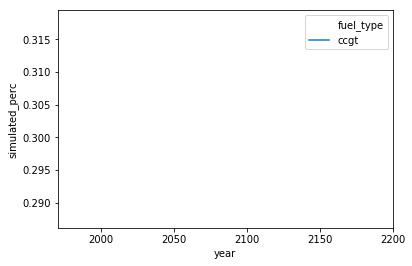

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 68)


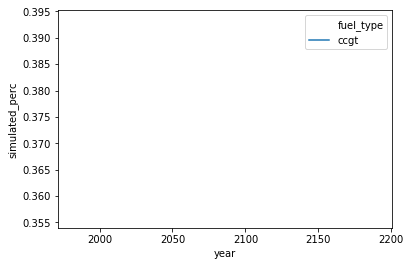

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 69)


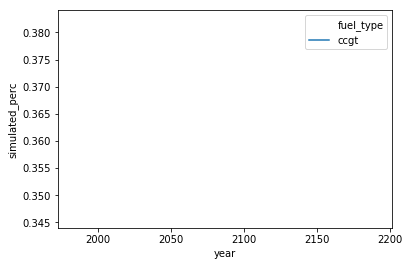

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 70)


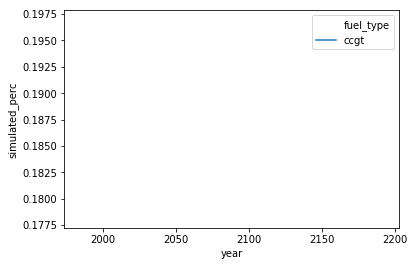

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 71)


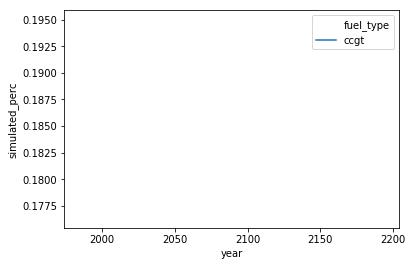

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 72)


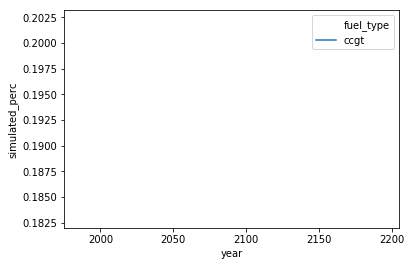

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 73)


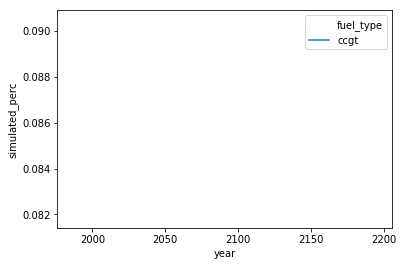

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 74)


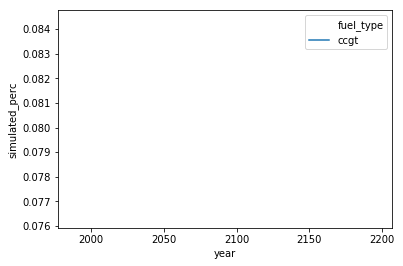

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 75)


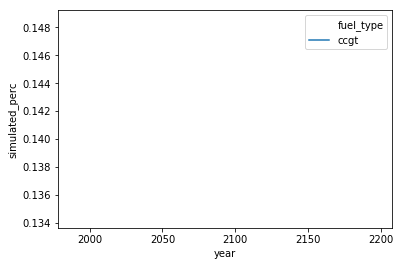

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 76)


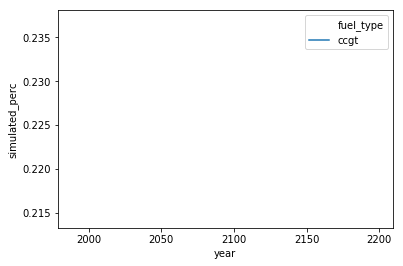

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 77)


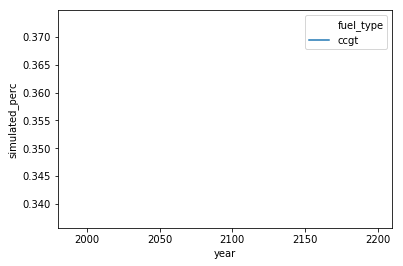

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 78)


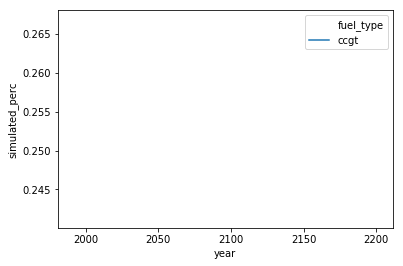

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 79)


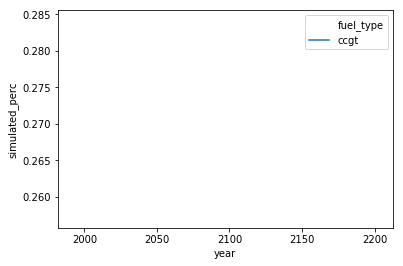

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 80)


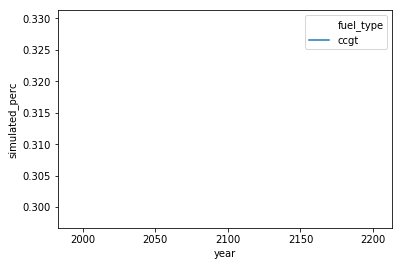

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 81)


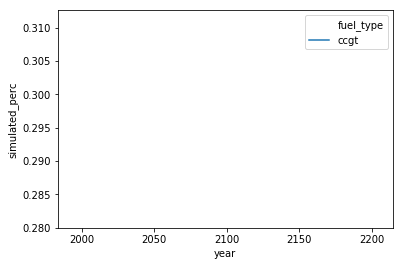

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 82)


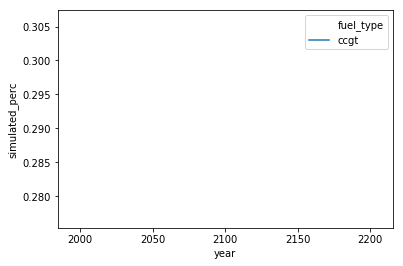

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 83)


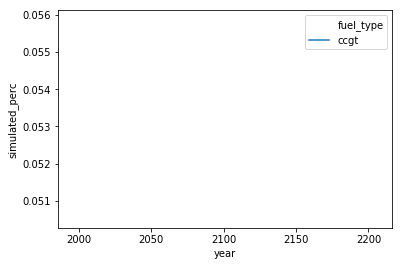

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 84)


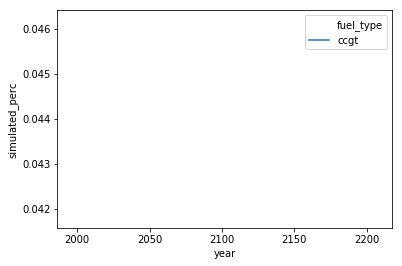

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 85)


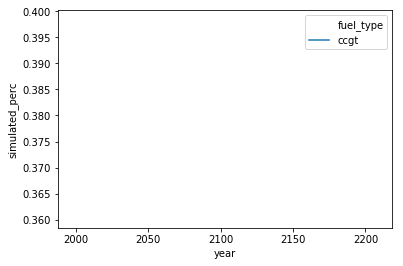

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 86)


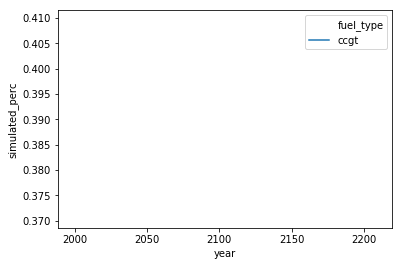

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 87)


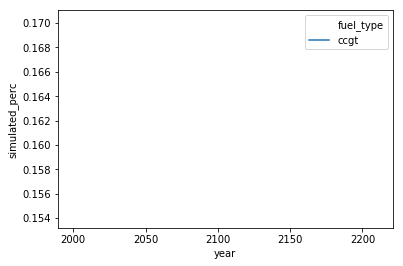

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 88)


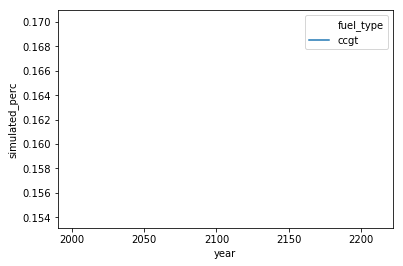

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 89)


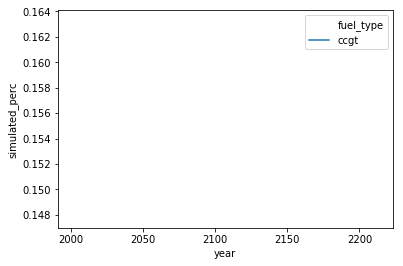

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 90)


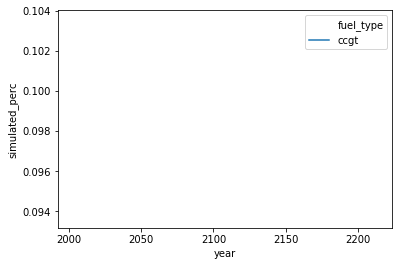

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 91)


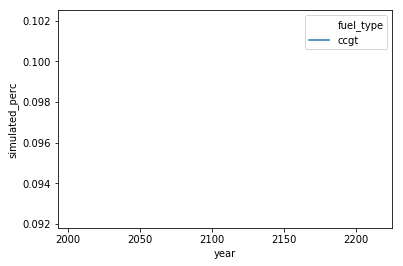

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 92)


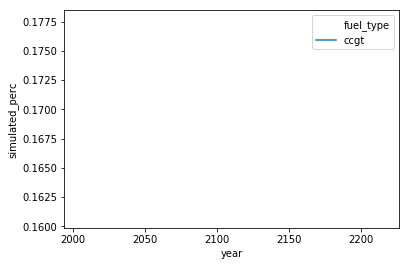

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 93)


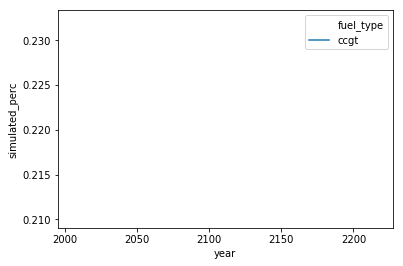

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 94)


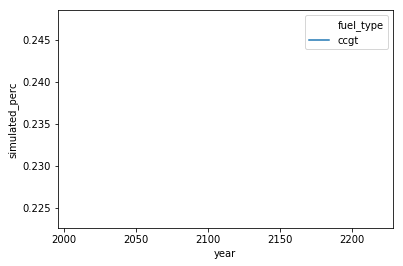

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 95)


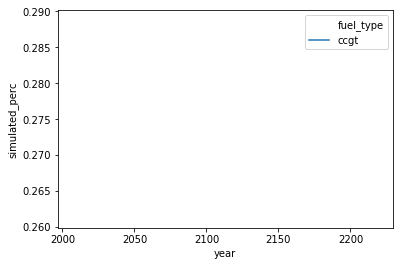

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 96)


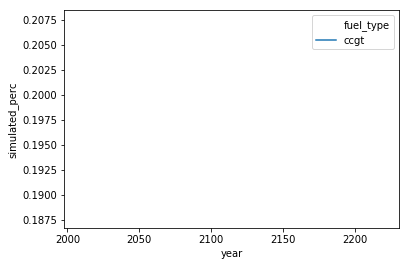

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 97)


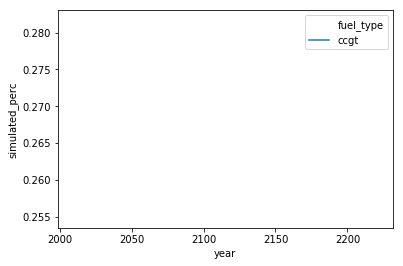

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 98)


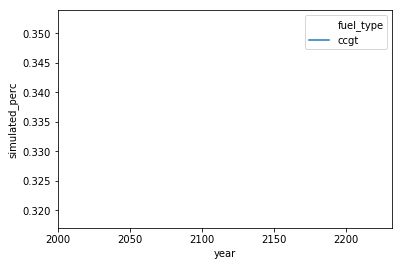

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 99)


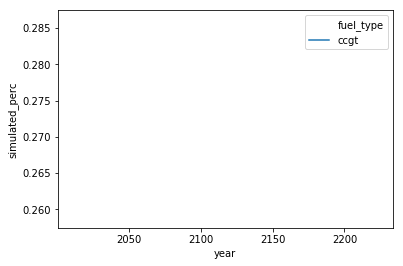

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 100)


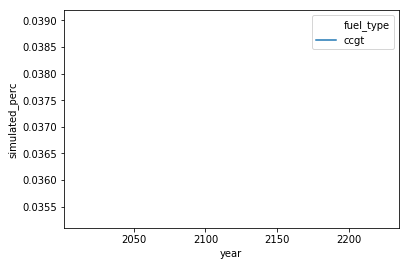

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 101)


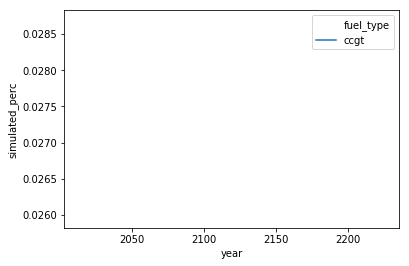

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 102)


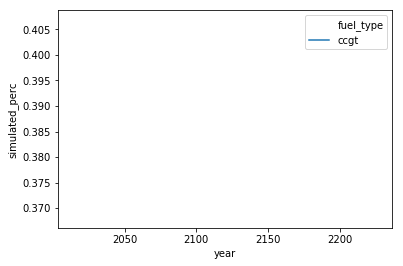

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 103)


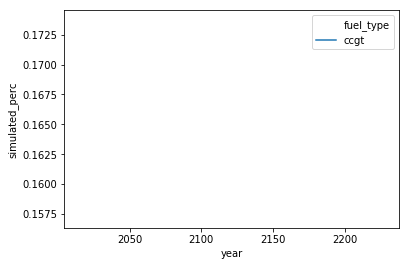

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 104)


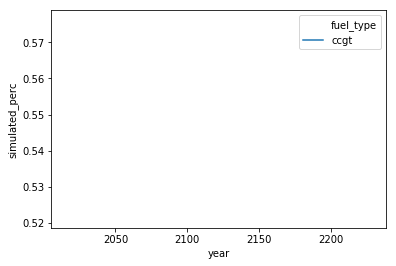

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 105)


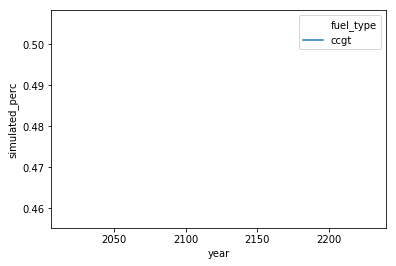

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 106)


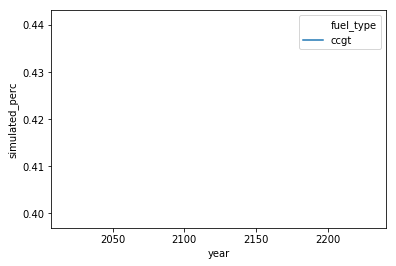

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 107)


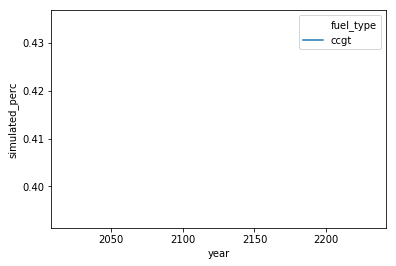

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 108)


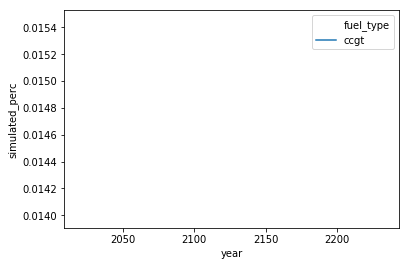

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 109)


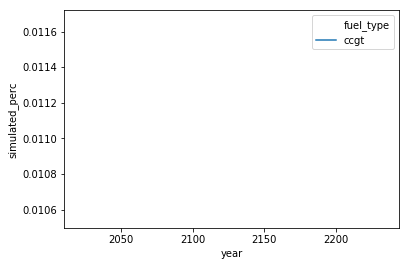

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 110)


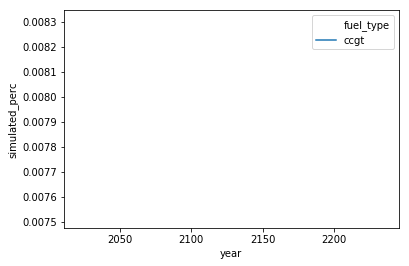

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 111)


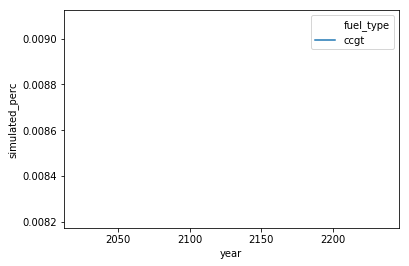

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 112)


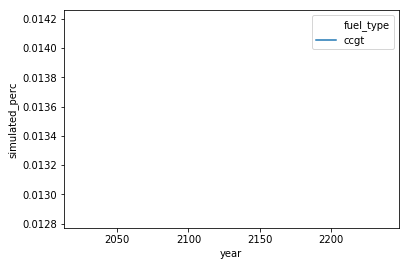

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 113)


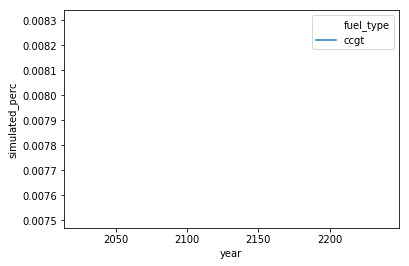

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 114)


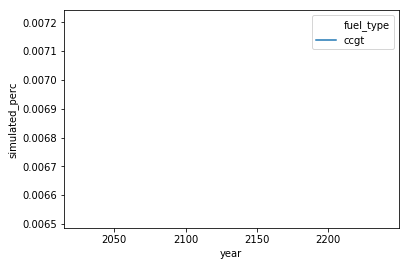

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 115)


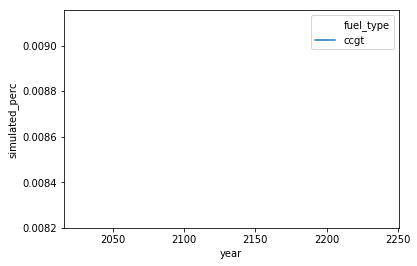

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 116)


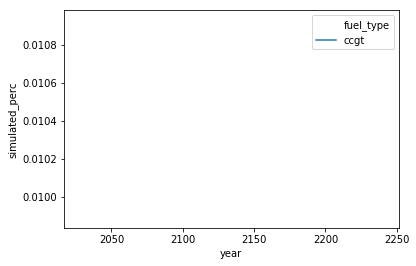

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 117)


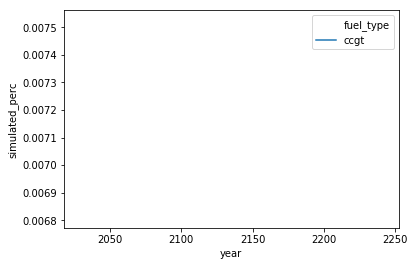

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 118)


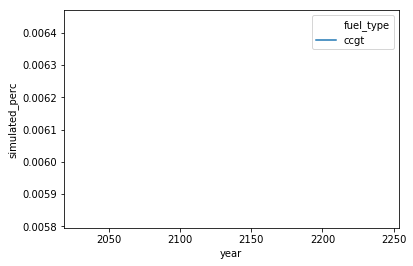

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 119)


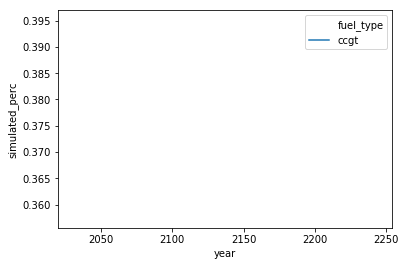

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 120)


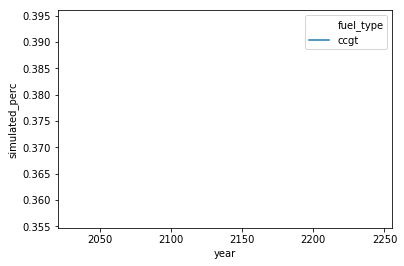

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 121)


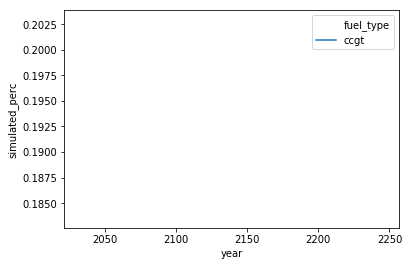

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 122)


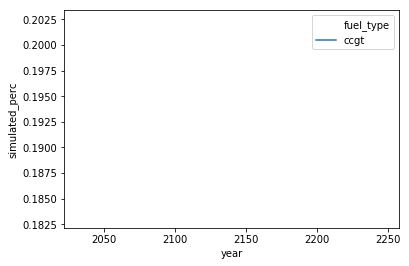

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 123)


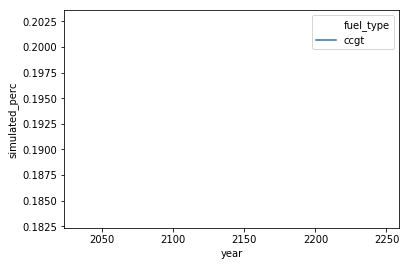

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 124)


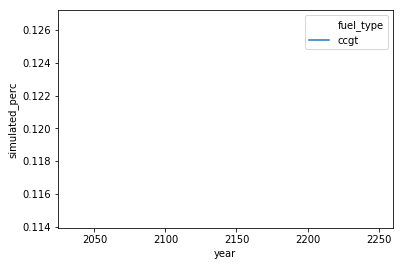

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 125)


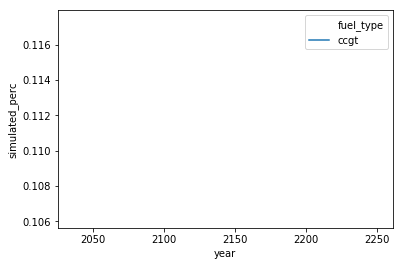

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 126)


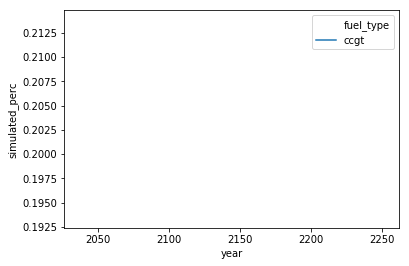

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 127)


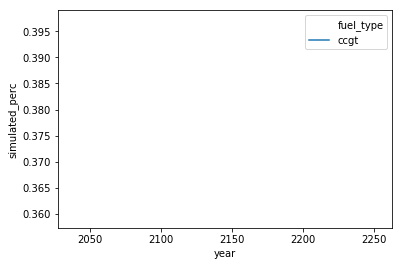

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 128)


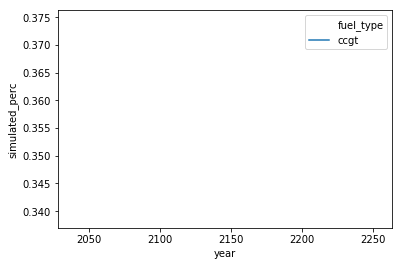

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 129)


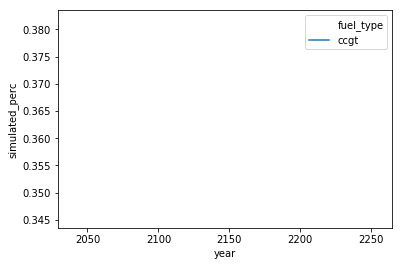

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 130)


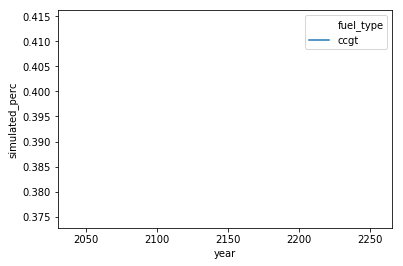

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 131)


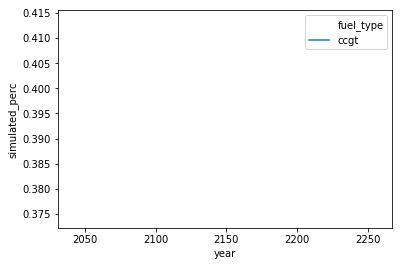

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 132)


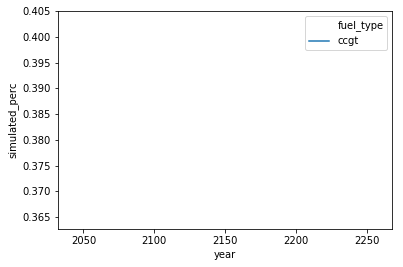

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 133)


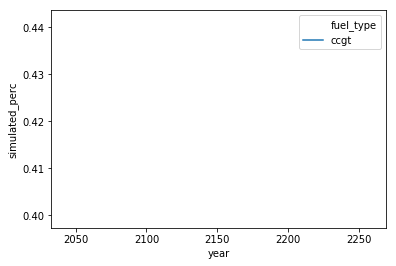

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 134)


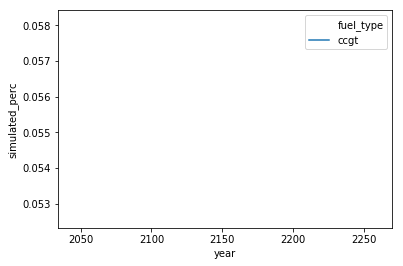

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 135)


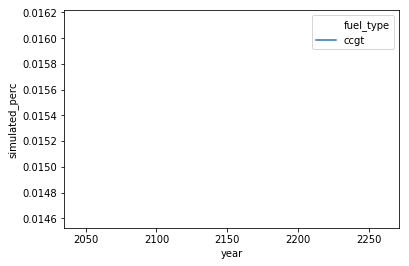

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 136)


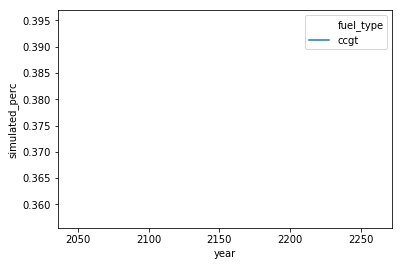

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 137)


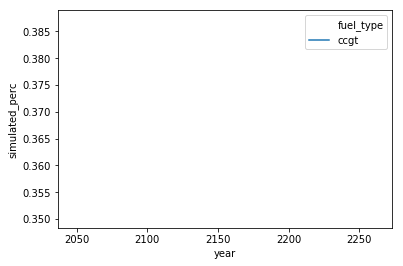

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 138)


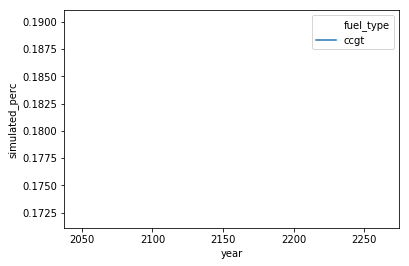

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 139)


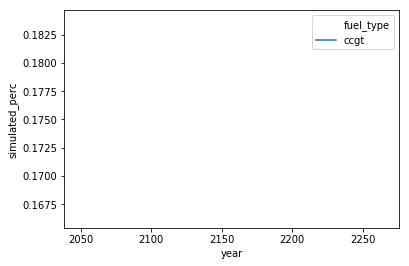

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 140)


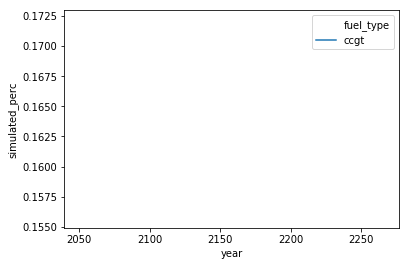

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 141)


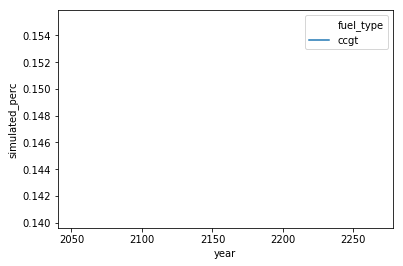

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 142)


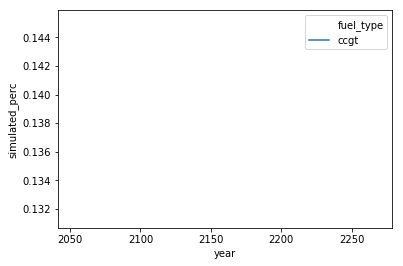

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 143)


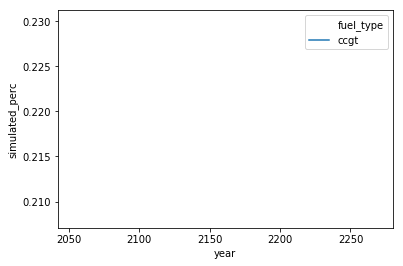

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 144)


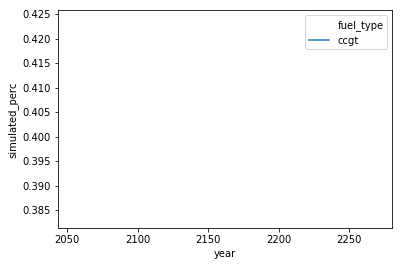

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 145)


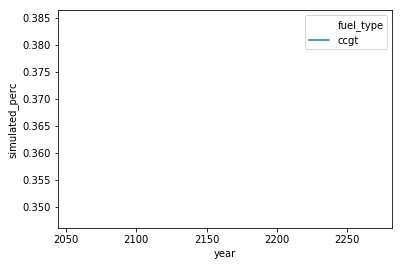

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 146)


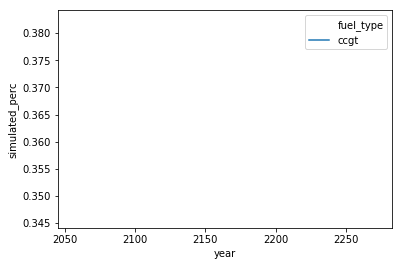

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 147)


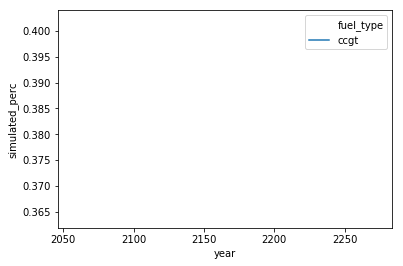

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 148)


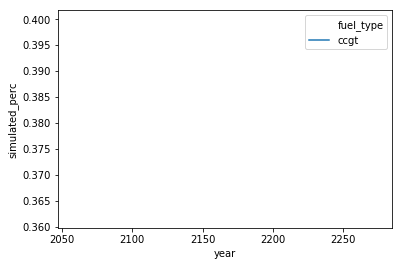

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 149)


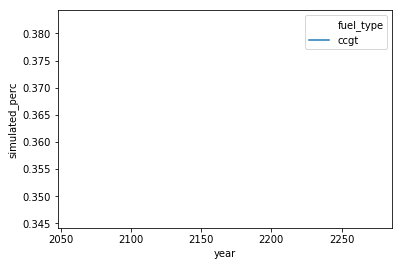

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 150)


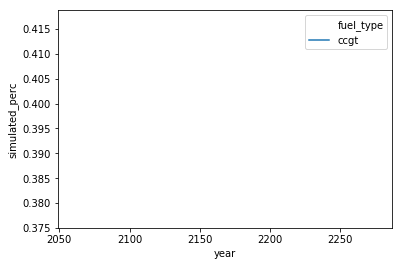

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 151)


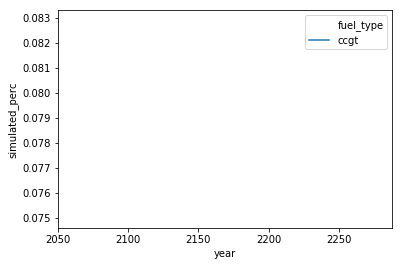

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 152)


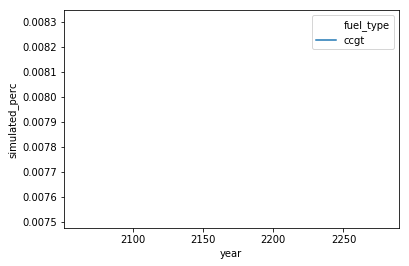

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 153)


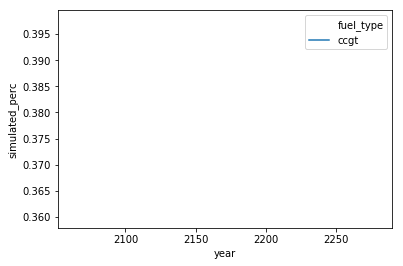

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 154)


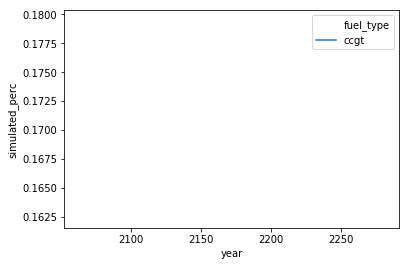

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 155)


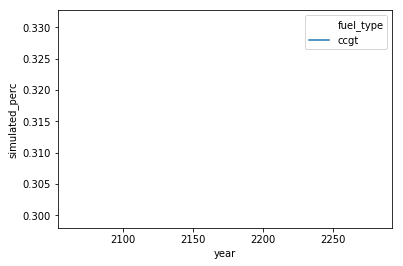

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 156)


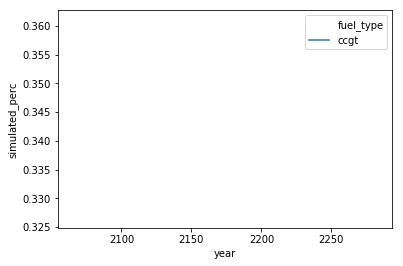

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 157)


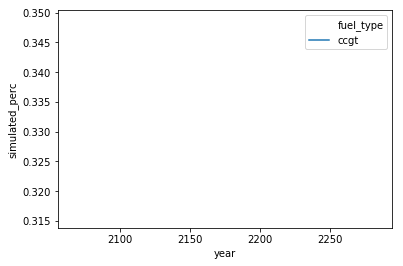

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 158)


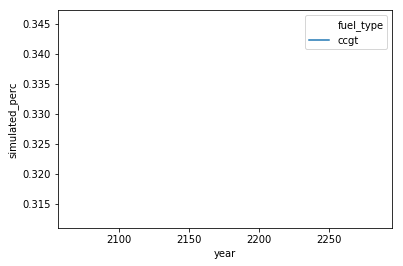

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 159)


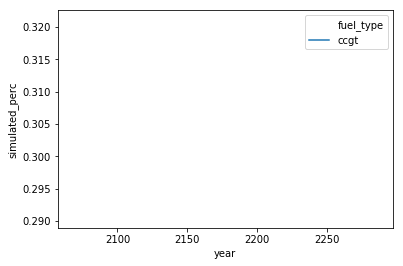

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 160)


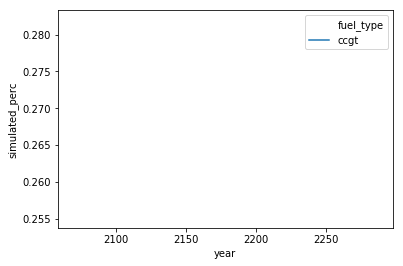

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 161)


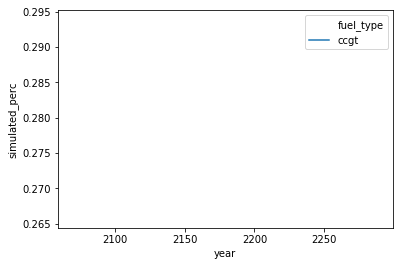

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 162)


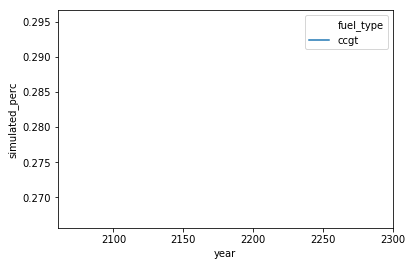

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 163)


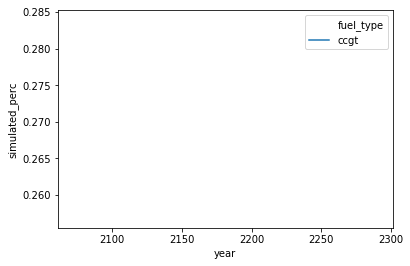

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 164)


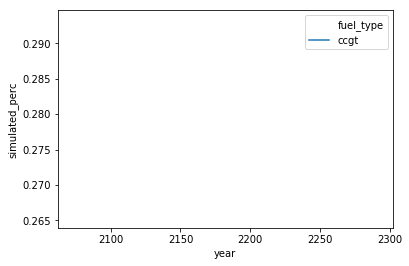

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 165)


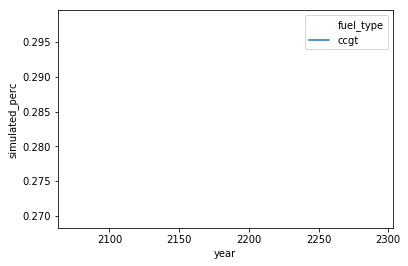

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 166)


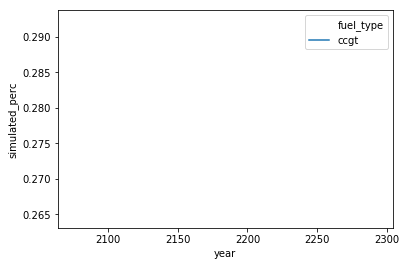

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 167)


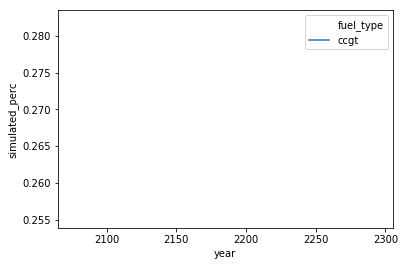

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 168)


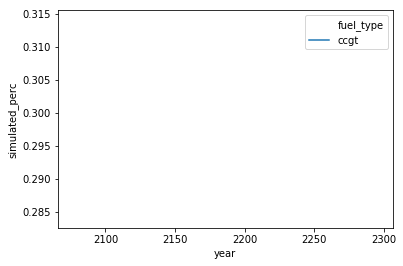

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 169)


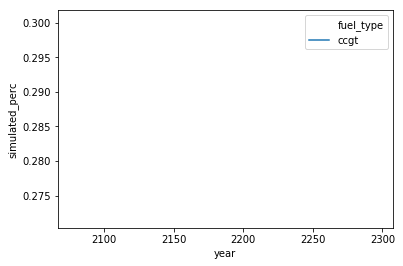

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 170)


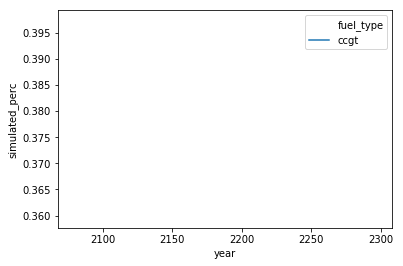

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 171)


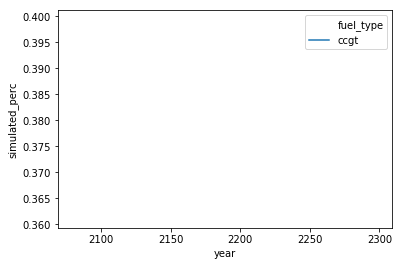

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 172)


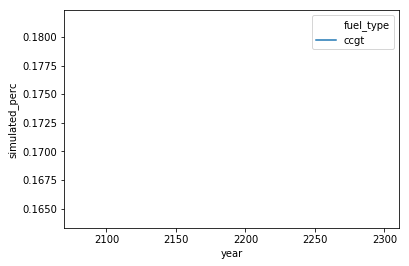

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 173)


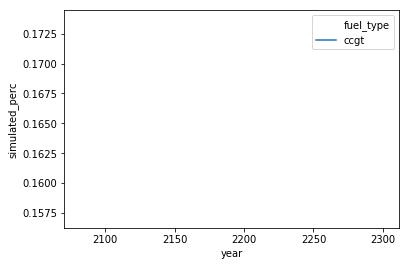

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 174)


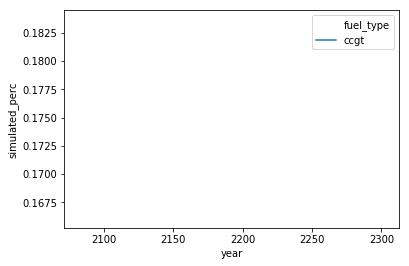

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 175)


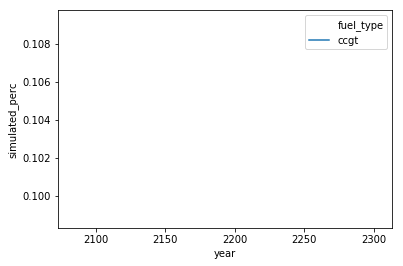

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 176)


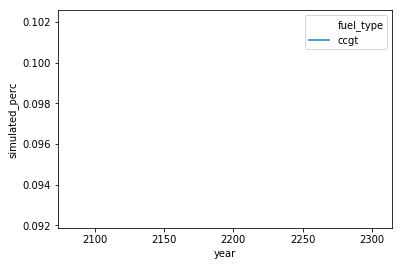

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 177)


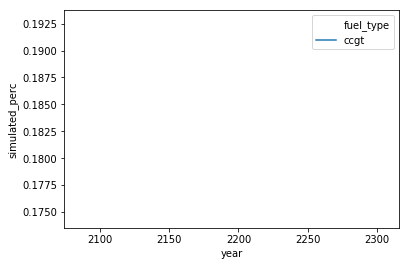

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 178)


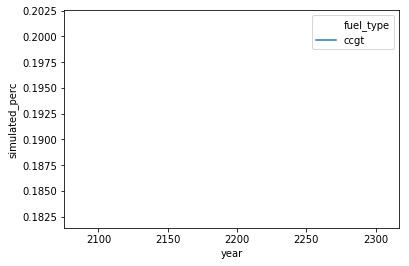

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 179)


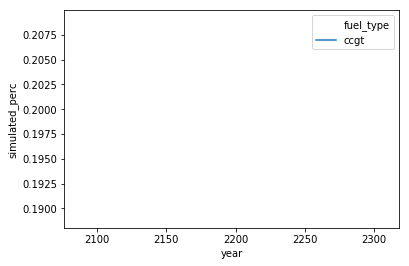

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 180)


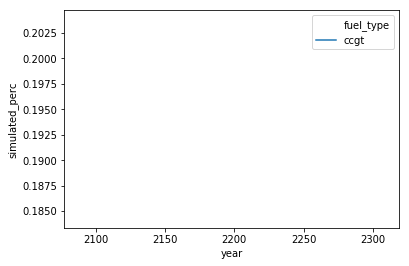

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 181)


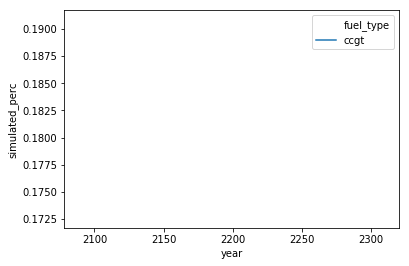

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 182)


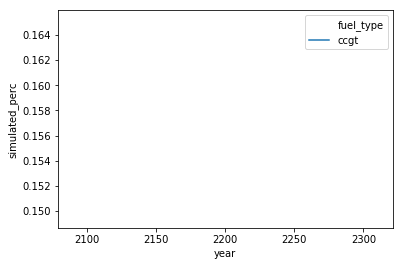

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 183)


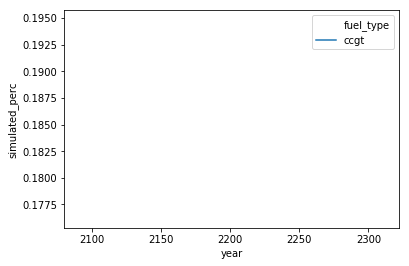

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 184)


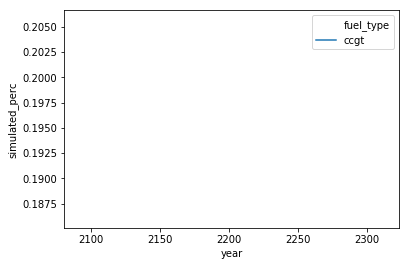

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 185)


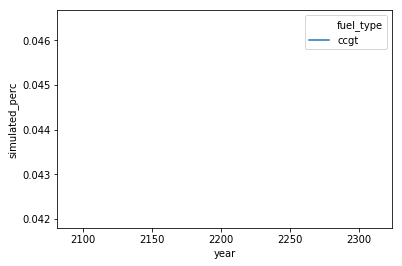

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 186)


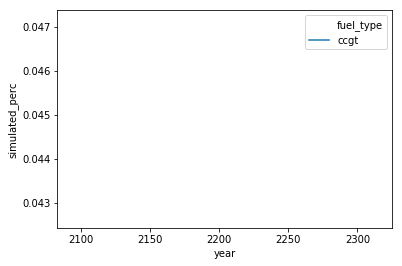

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 187)


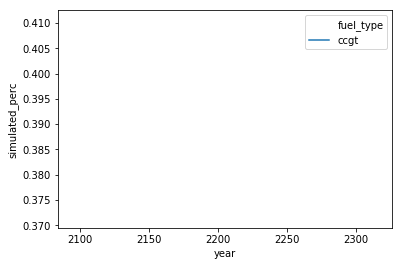

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 188)


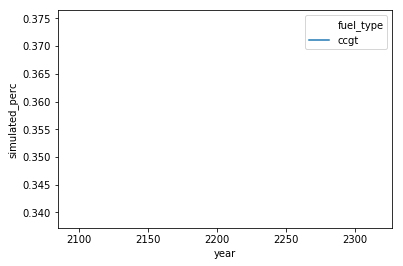

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 189)


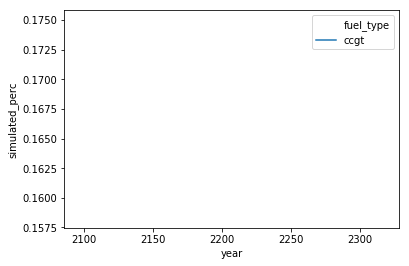

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 190)


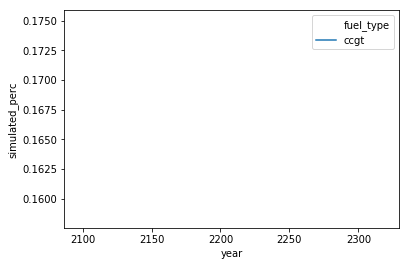

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 191)


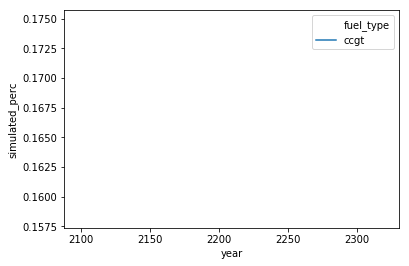

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 192)


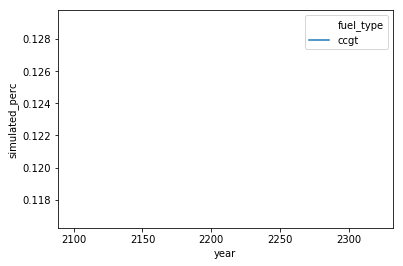

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 193)


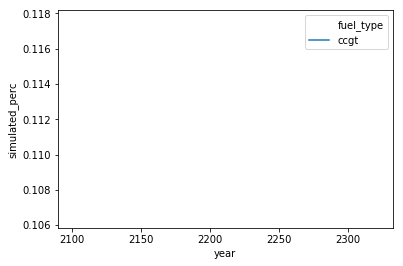

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 194)


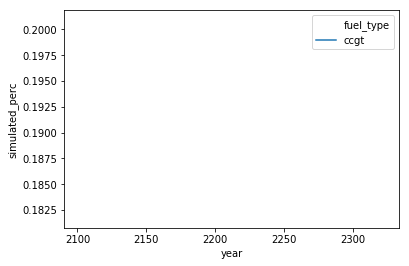

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 195)


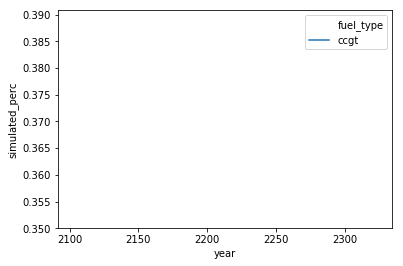

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 196)


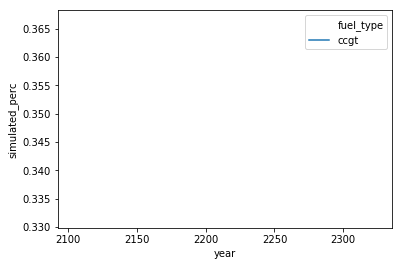

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 197)


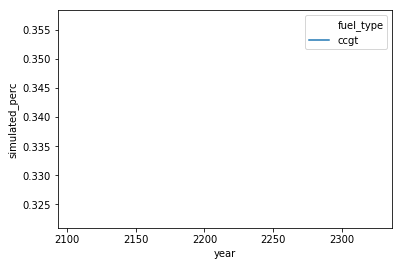

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 198)


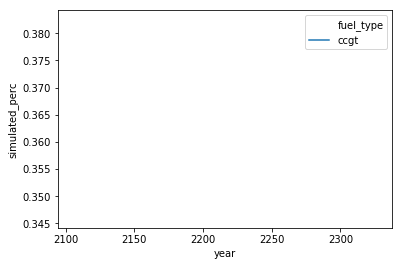

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 199)


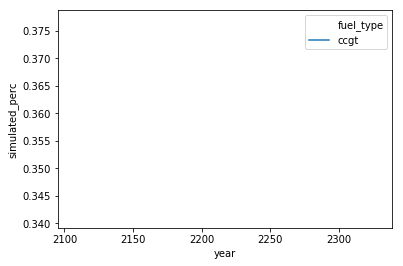

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 200)


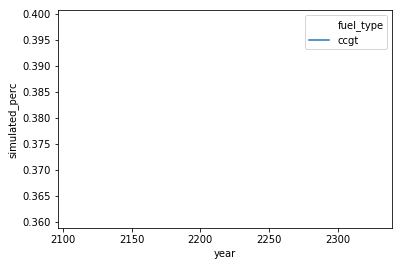

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 201)


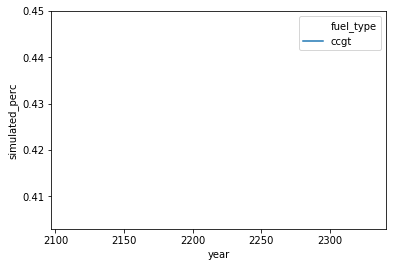

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 202)


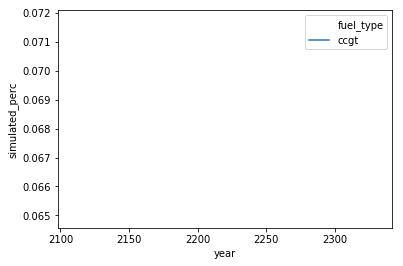

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 203)


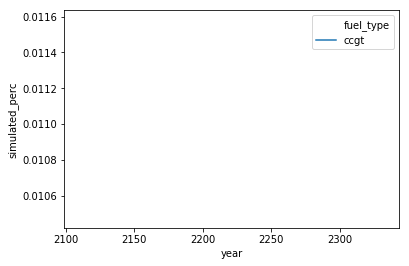

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 204)


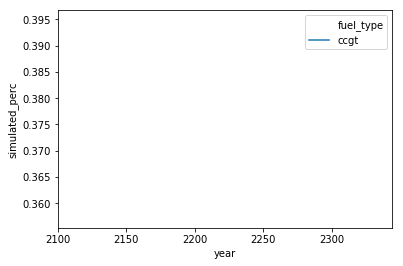

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 205)


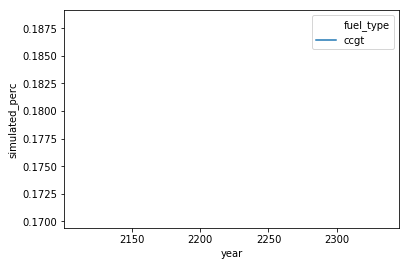

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 206)


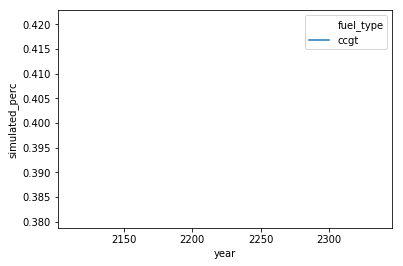

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 207)


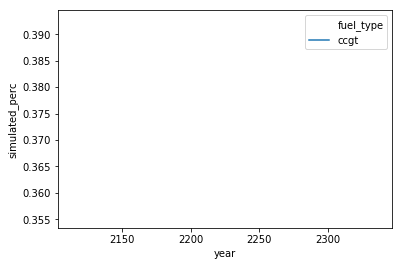

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 208)


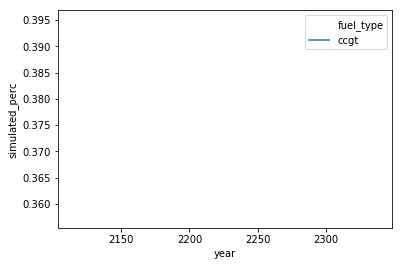

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 209)


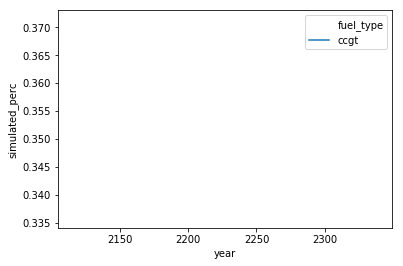

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 210)


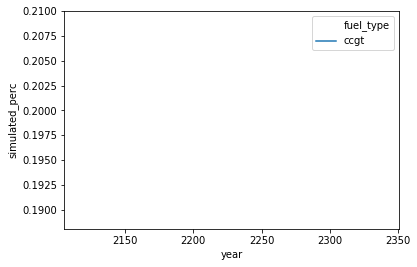

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 211)


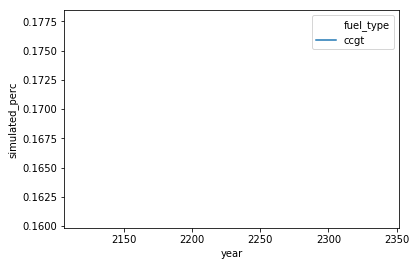

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 212)


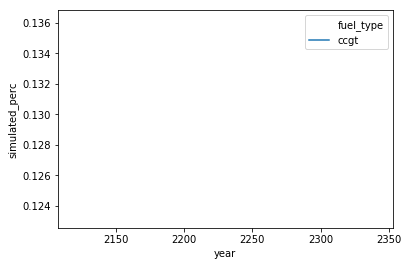

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 213)


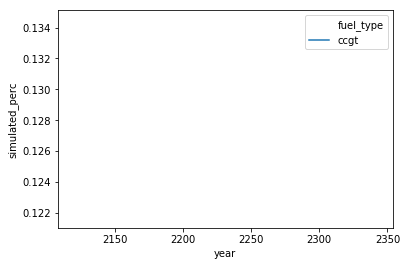

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 214)


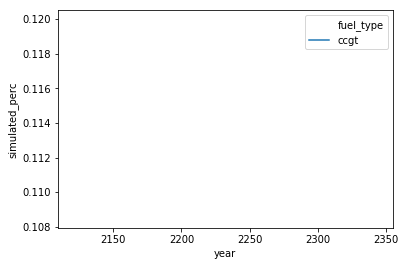

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 215)


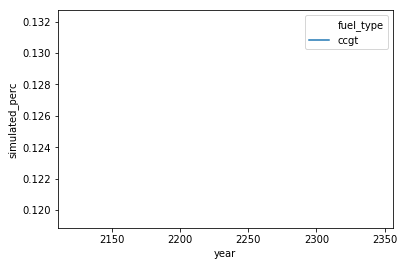

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 216)


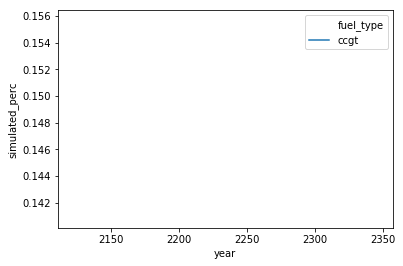

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 217)


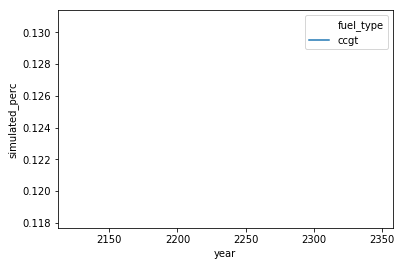

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 218)


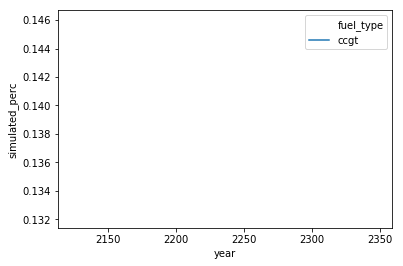

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 219)


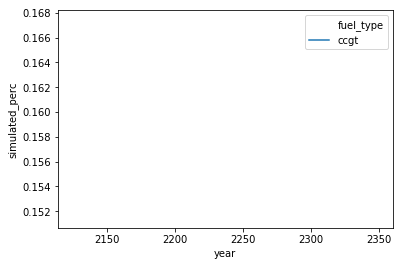

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 220)


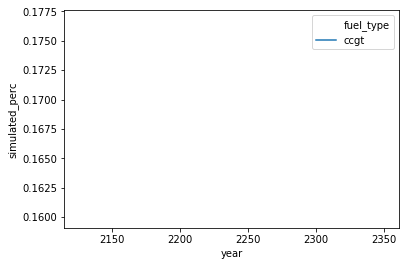

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 221)


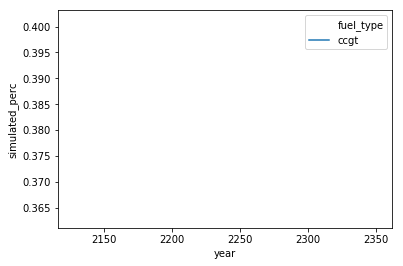

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 222)


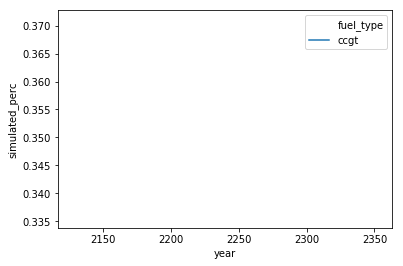

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 223)


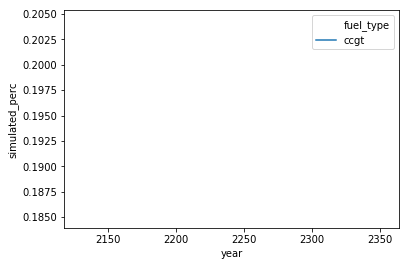

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 224)


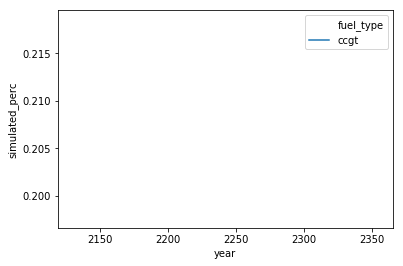

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 225)


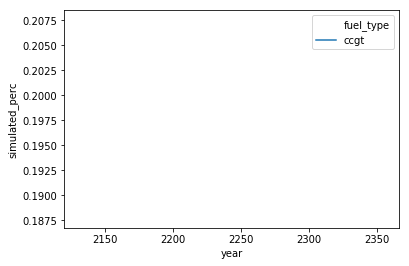

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 226)


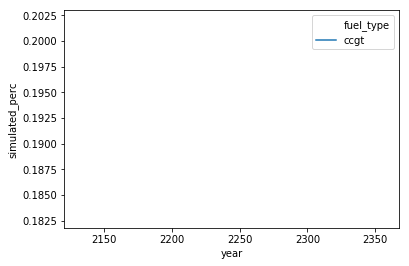

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 227)


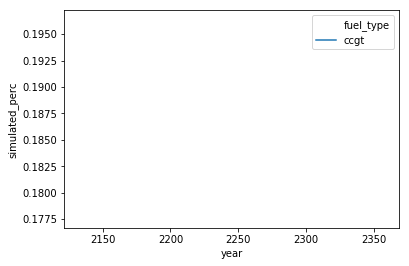

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 228)


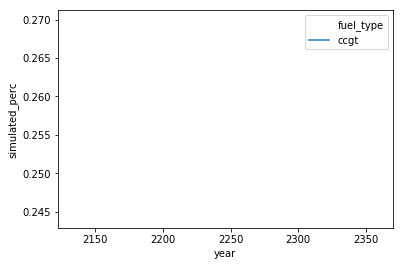

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 229)


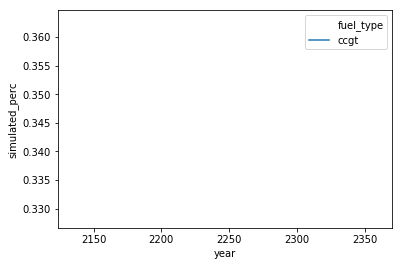

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 230)


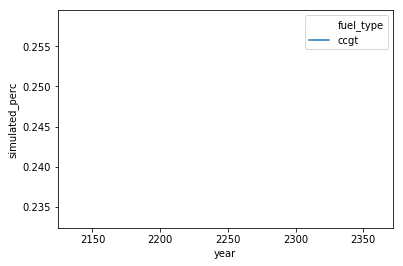

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 231)


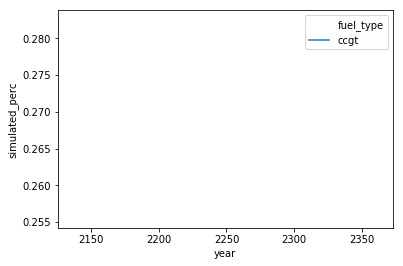

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 232)


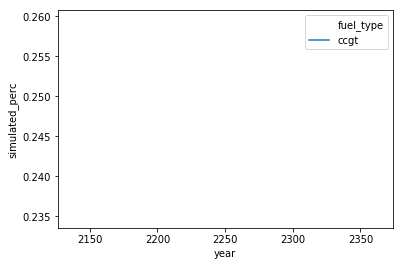

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 233)


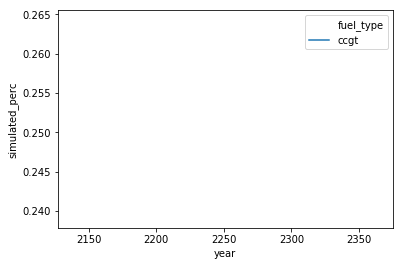

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 234)


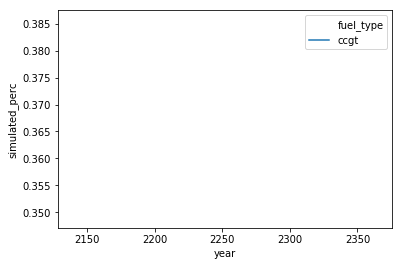

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 235)


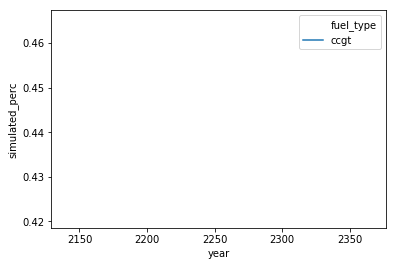

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 236)


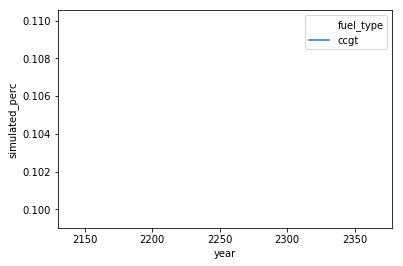

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 237)


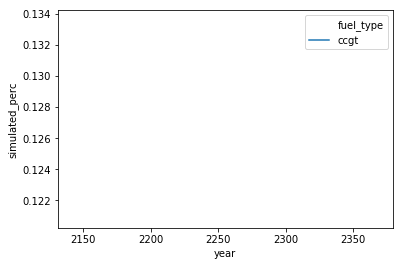

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 238)


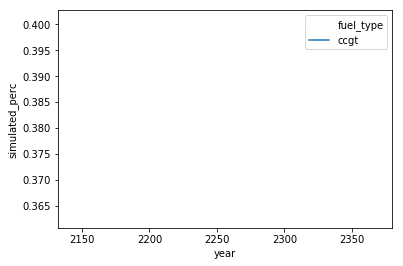

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 239)


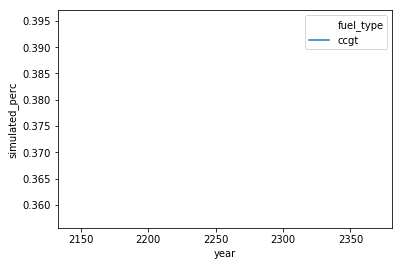

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 240)


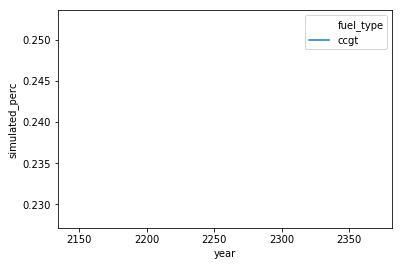

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 241)


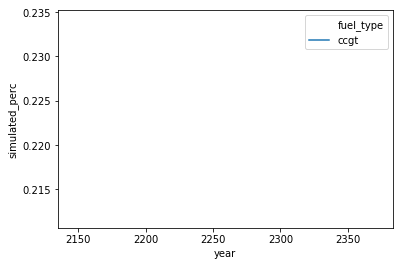

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 242)


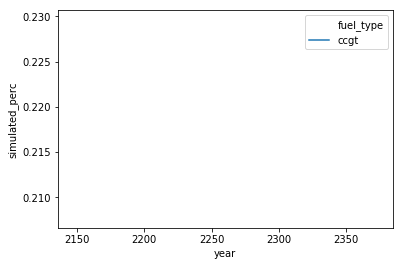

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 243)


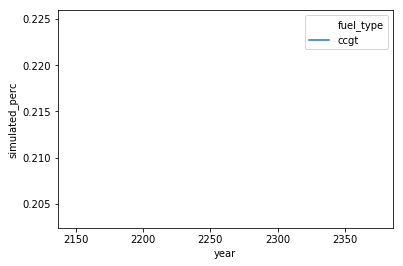

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 244)


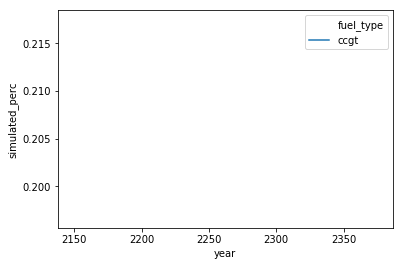

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 245)


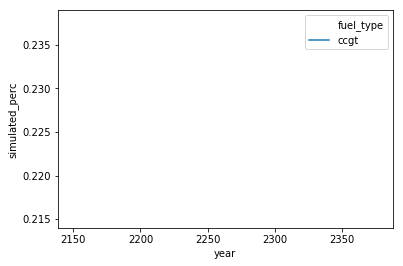

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 246)


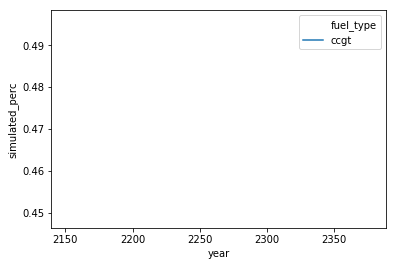

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 247)


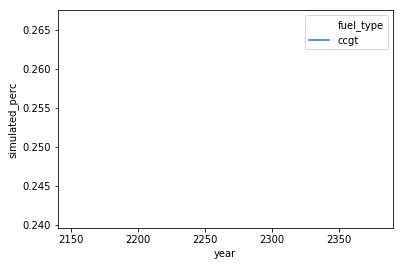

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 248)


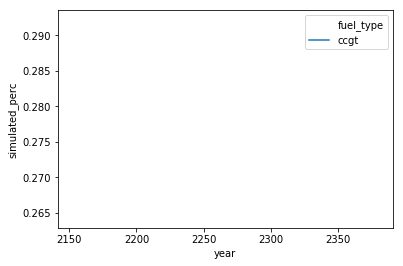

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 249)


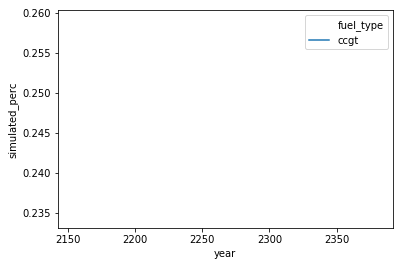

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 250)


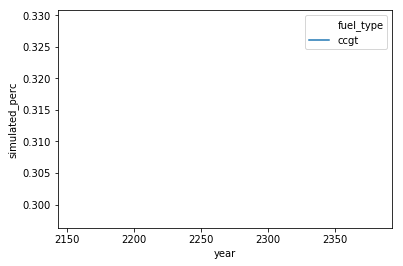

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 251)


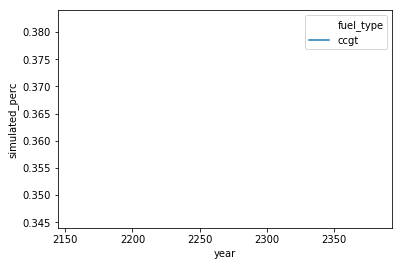

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 252)


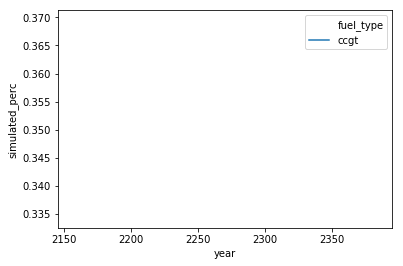

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 253)


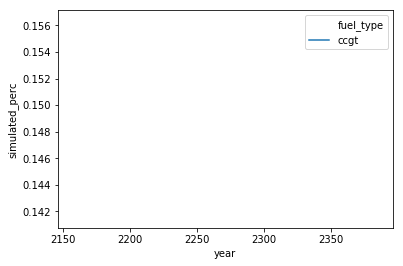

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 254)


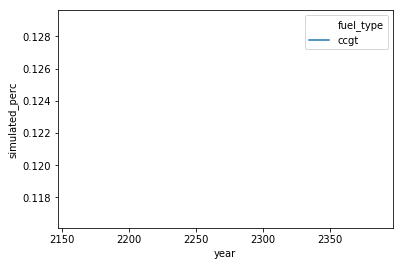

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 255)


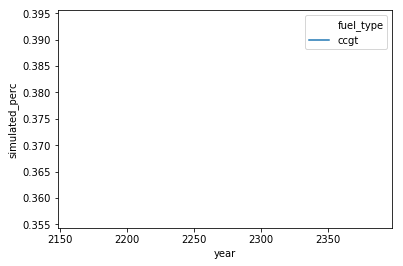

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 256)


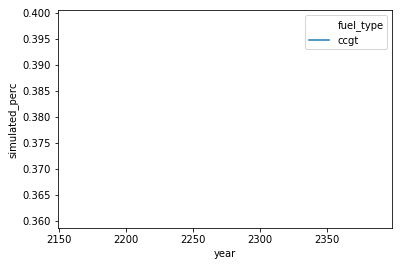

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 257)


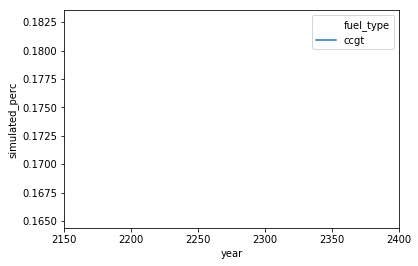

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 258)


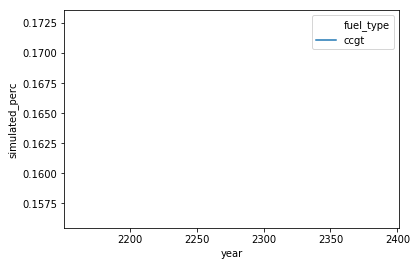

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 259)


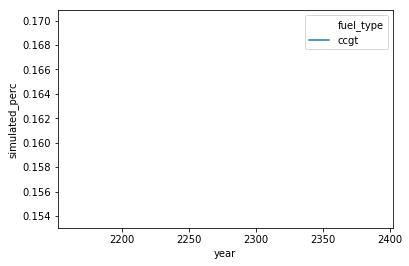

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 260)


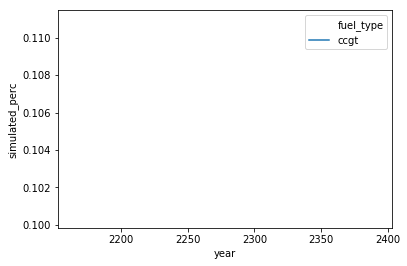

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 261)


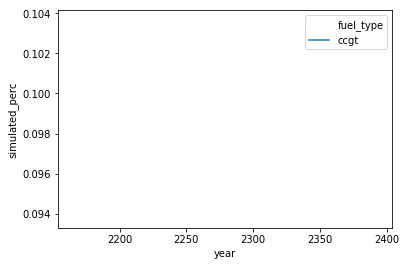

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 262)


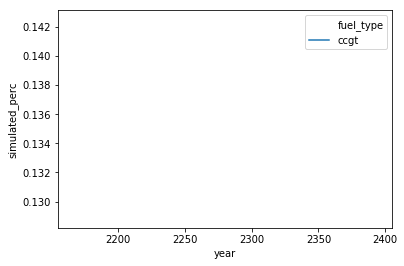

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 263)


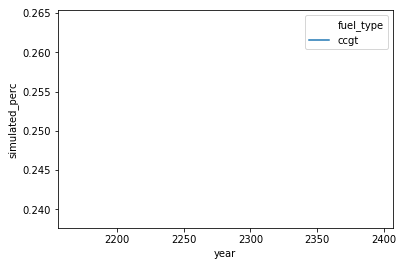

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 264)


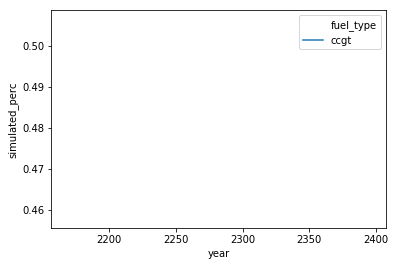

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 265)


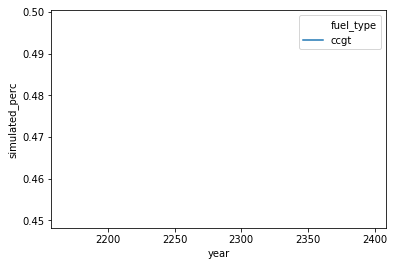

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 266)


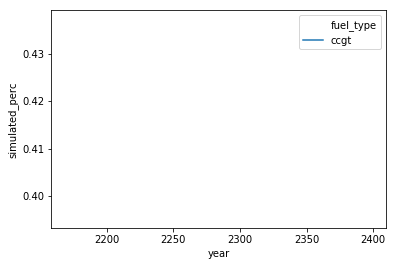

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 267)


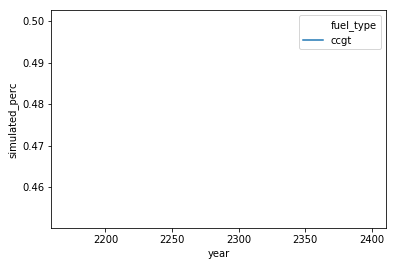

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 268)


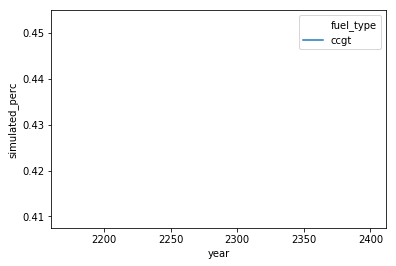

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 269)


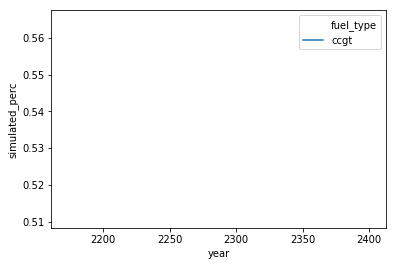

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 270)


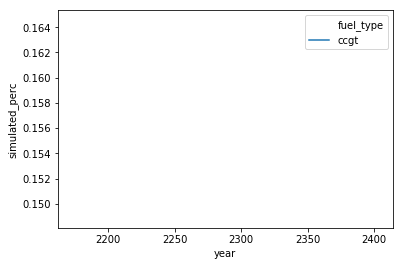

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 271)


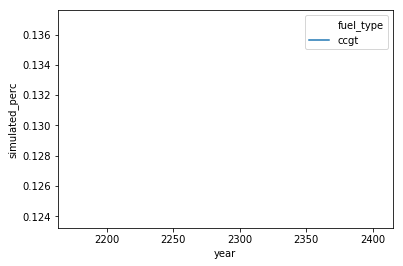

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 272)


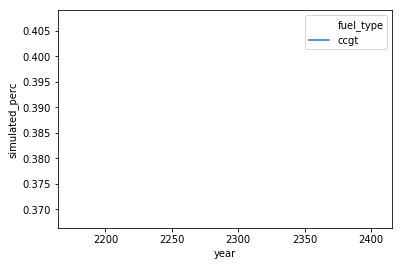

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 273)


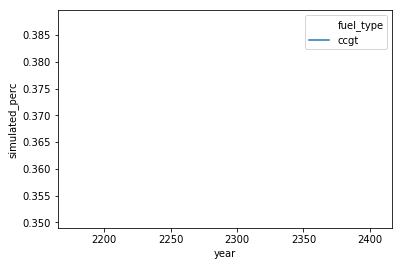

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 274)


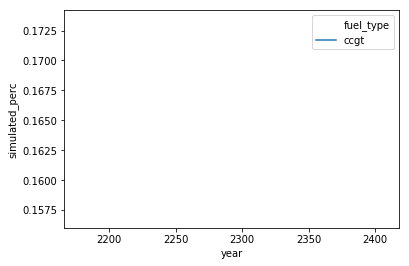

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 275)


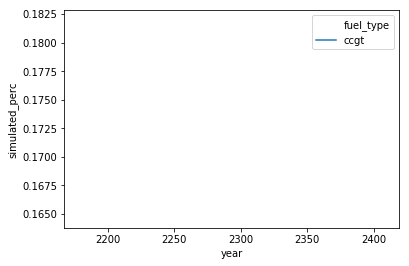

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 276)


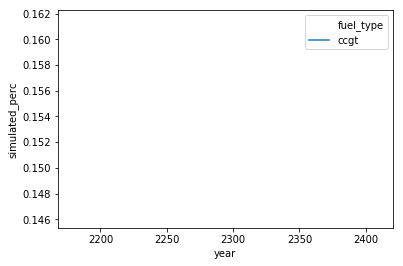

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 277)


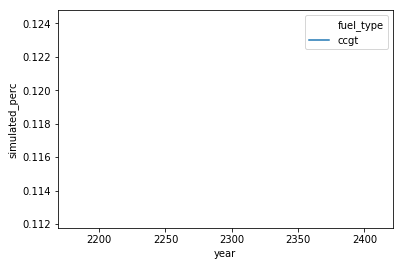

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 278)


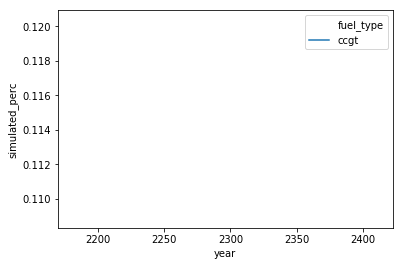

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 279)


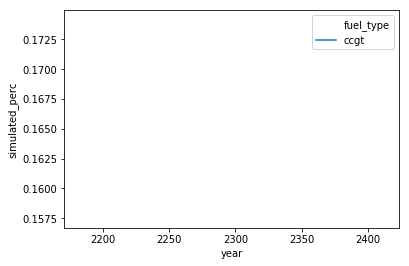

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 280)


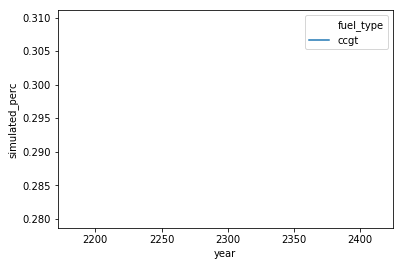

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 281)


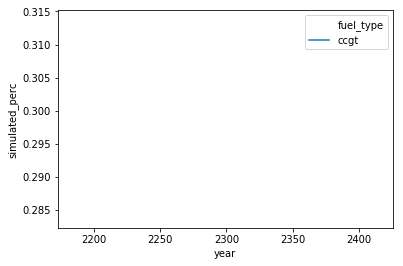

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 282)


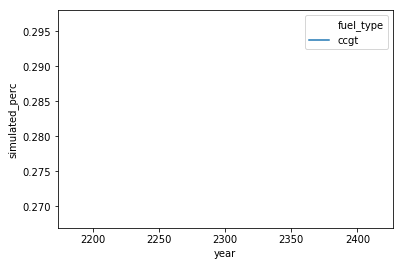

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 283)


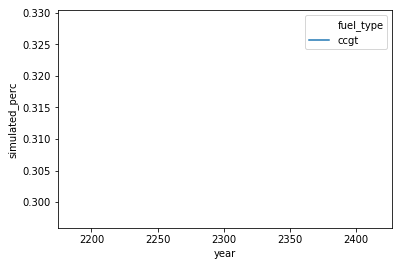

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 284)


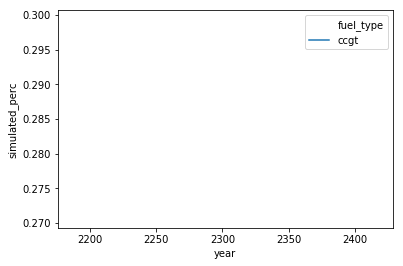

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 285)


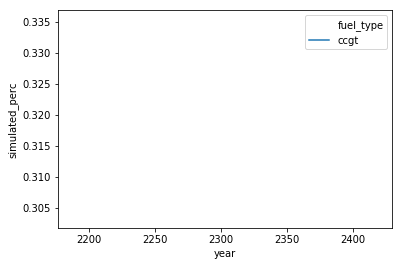

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 286)


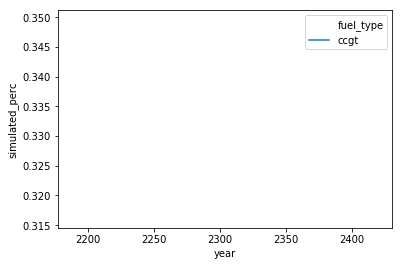

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 287)


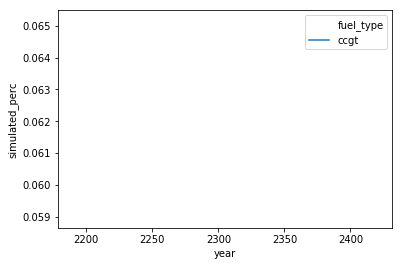

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 288)


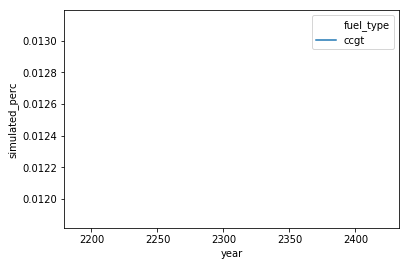

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 289)


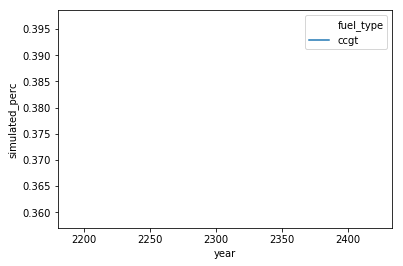

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 290)


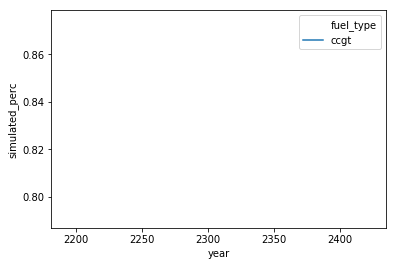

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 291)


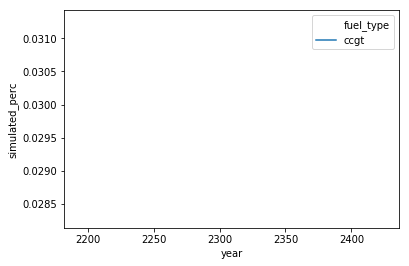

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 292)


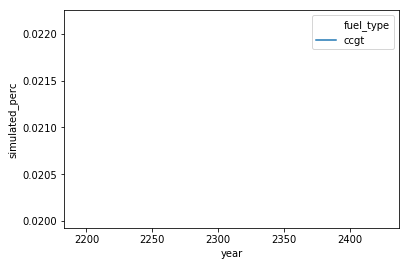

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 293)


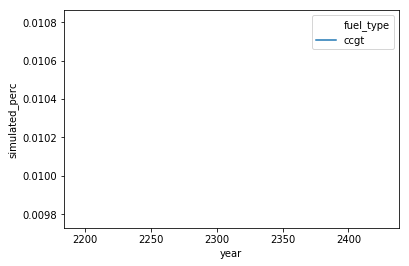

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 294)


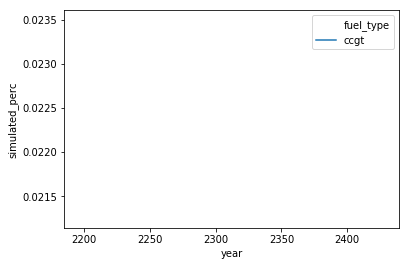

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 295)


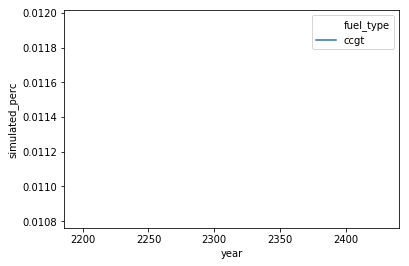

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 296)


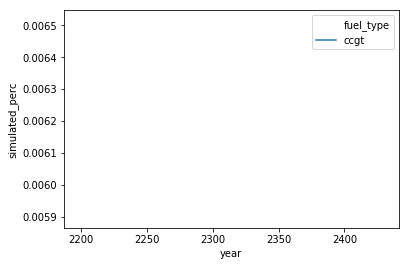

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 297)


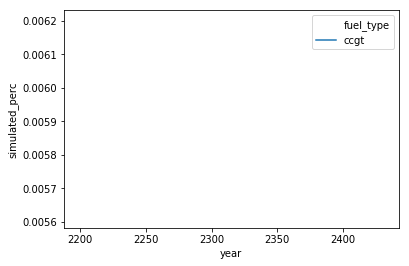

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 298)


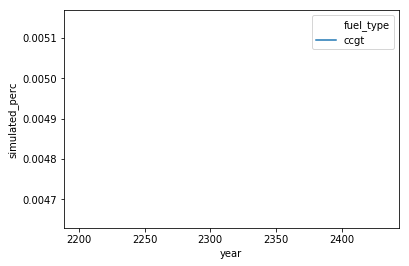

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 299)


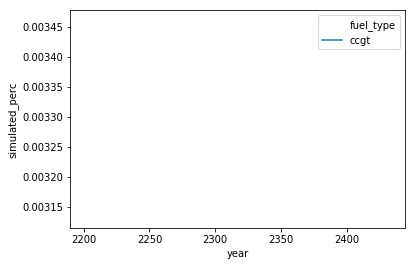

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 300)


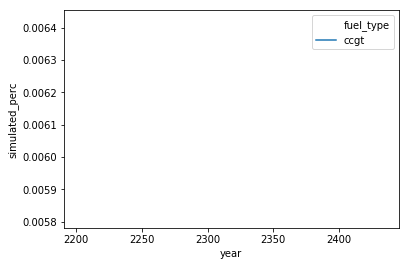

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 301)


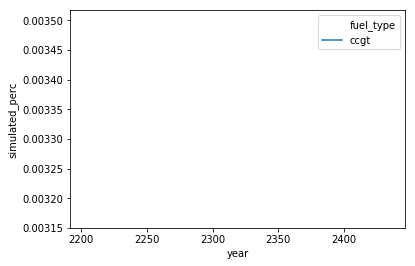

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 302)


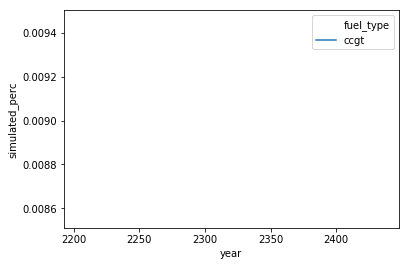

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 303)


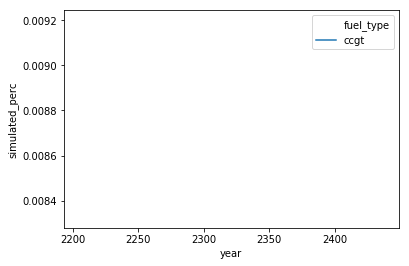

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 304)


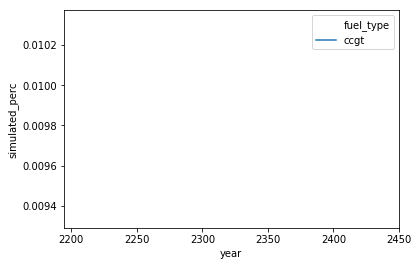

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 305)


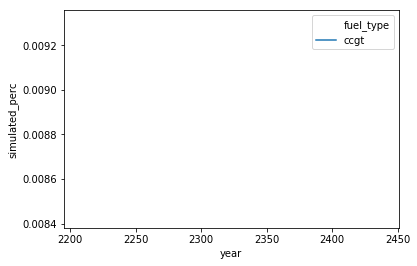

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 306)


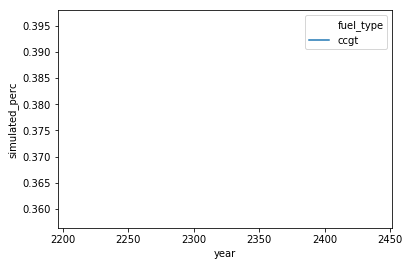

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 307)


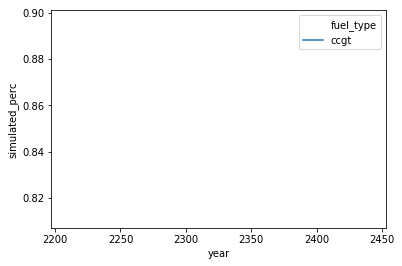

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 308)


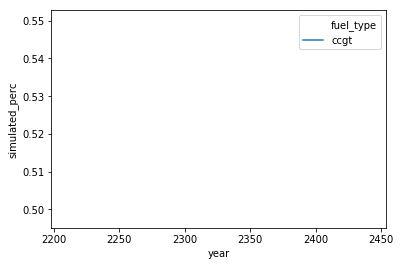

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 309)


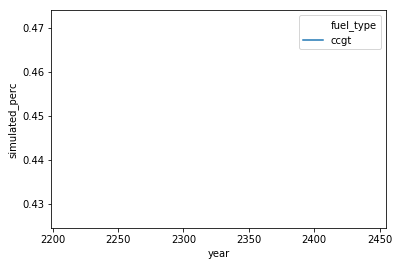

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 310)


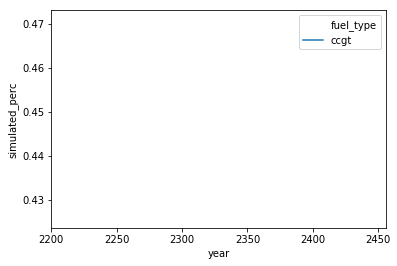

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 311)


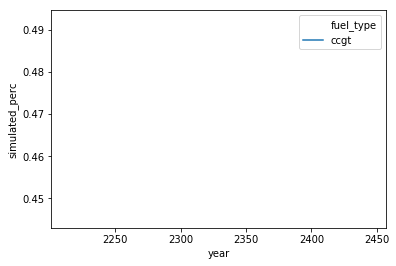

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 312)


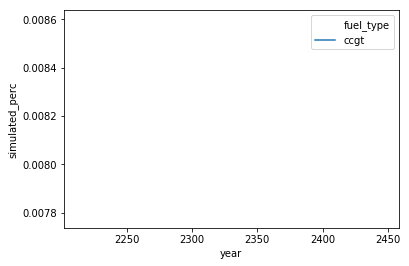

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 313)


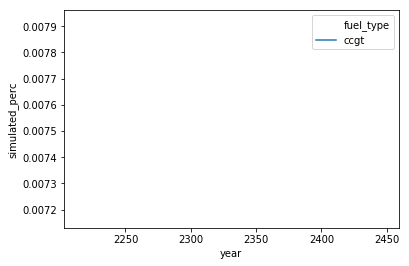

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 314)


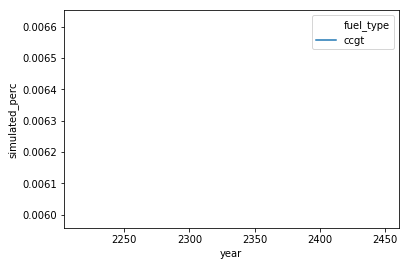

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 315)


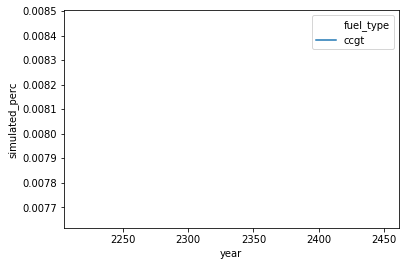

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 316)


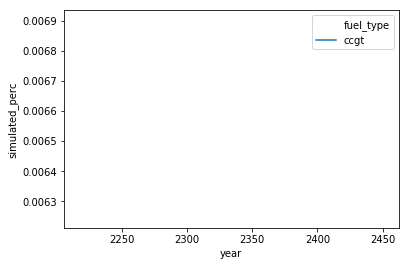

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 317)


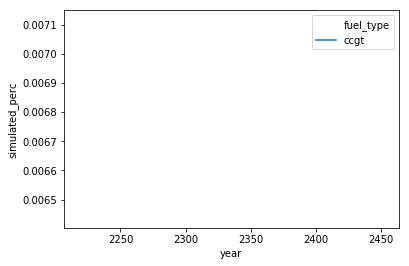

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 318)


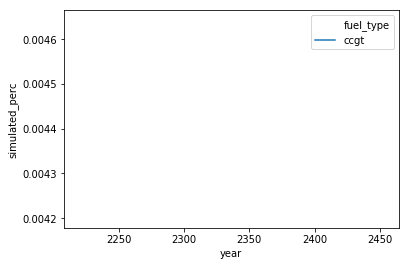

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 319)


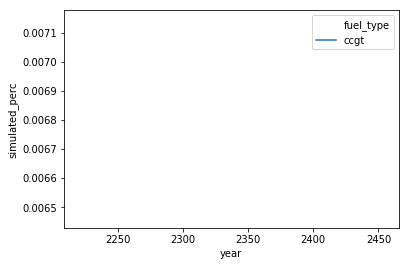

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 320)


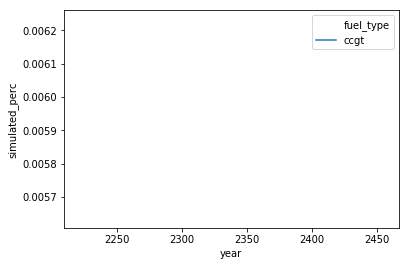

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 321)


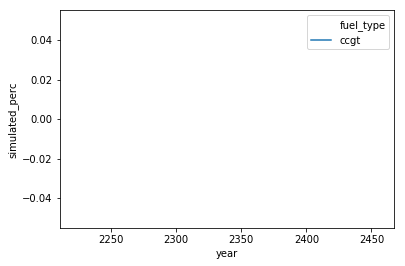

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 322)


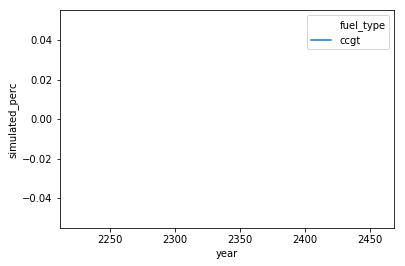

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 323)


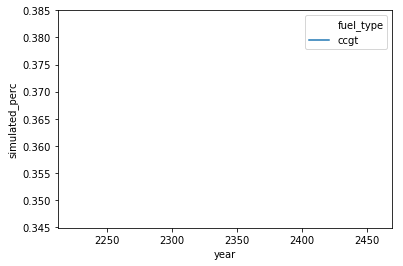

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 324)


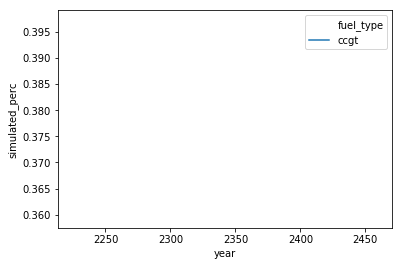

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 325)


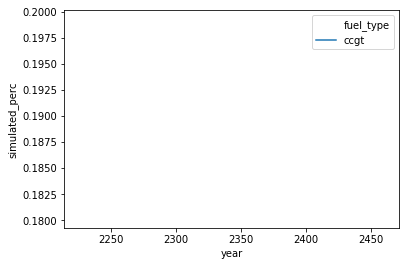

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 326)


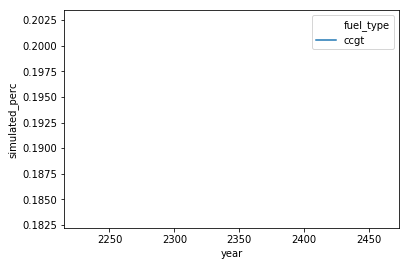

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 327)


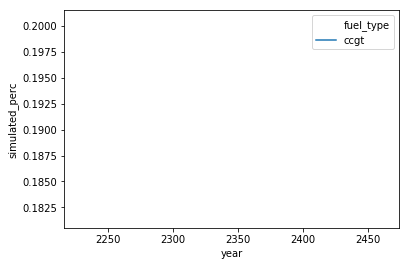

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 328)


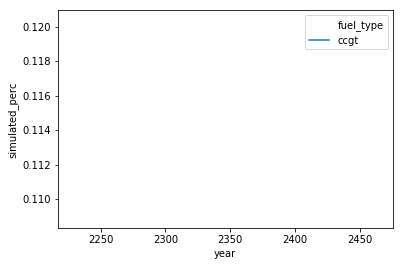

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 329)


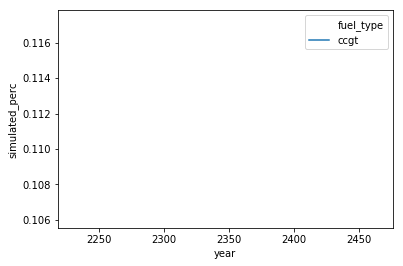

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 330)


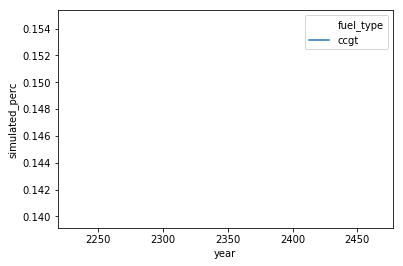

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 331)


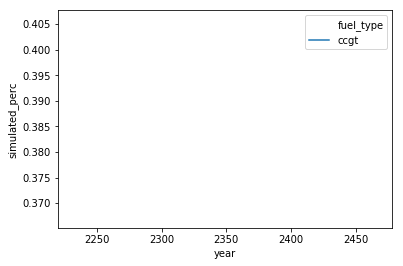

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 332)


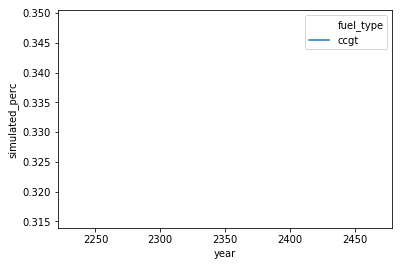

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 333)


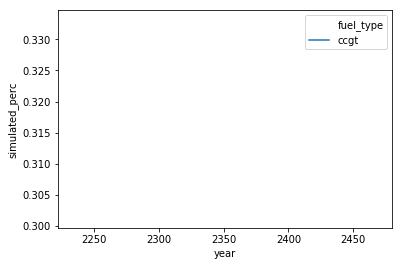

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 334)


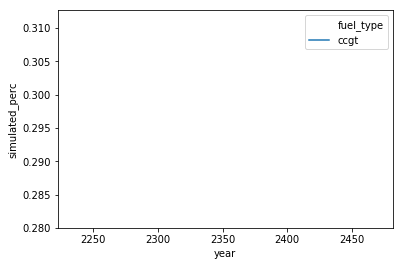

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 335)


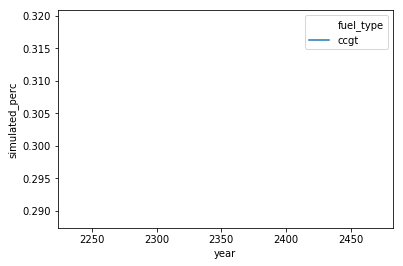

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 336)


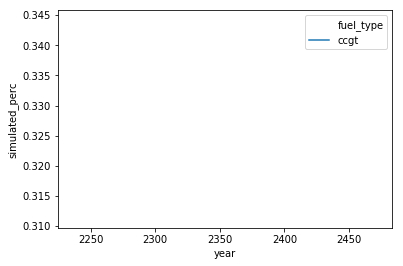

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 337)


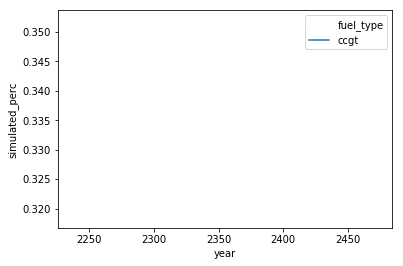

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 338)


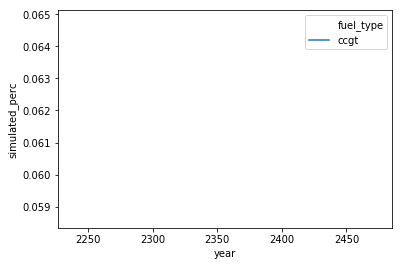

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 339)


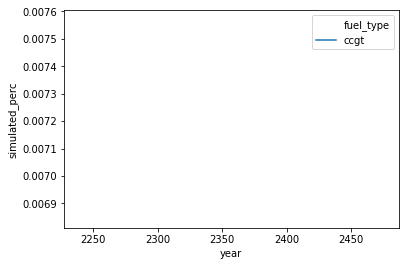

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 340)


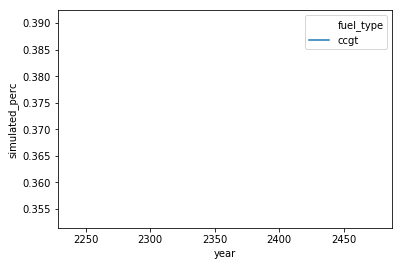

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 341)


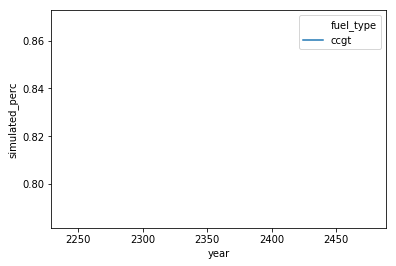

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 342)


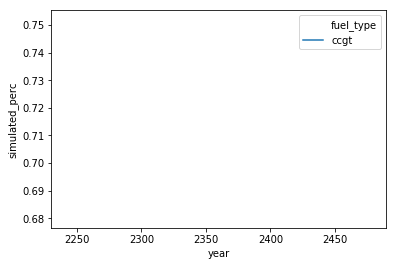

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 343)


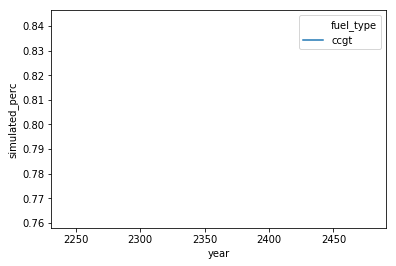

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 344)


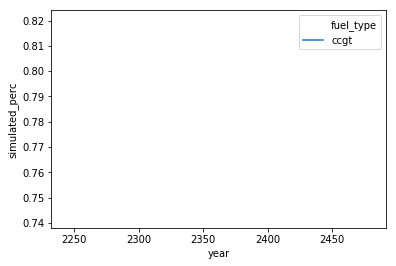

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 345)


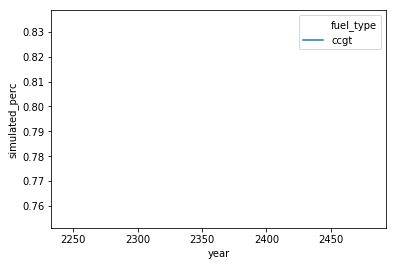

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 346)


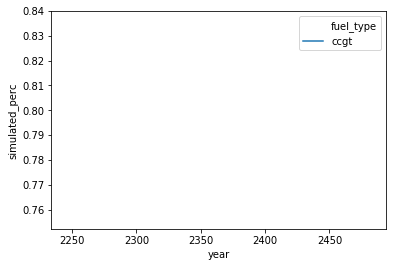

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 347)


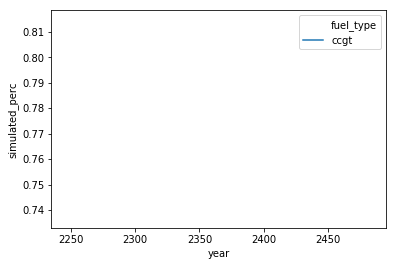

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 348)


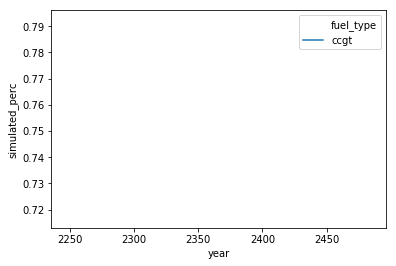

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 349)


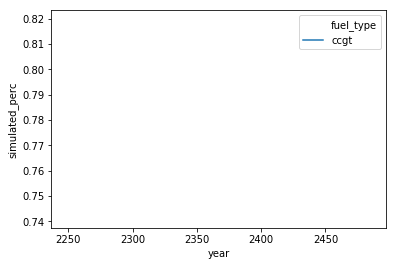

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 350)


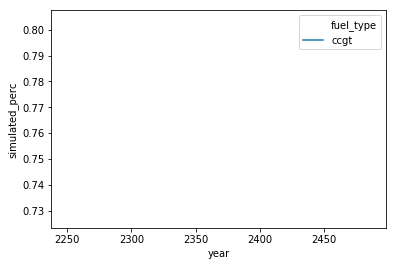

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 351)


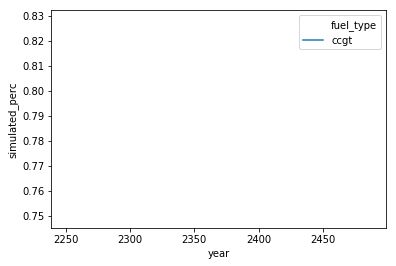

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 352)


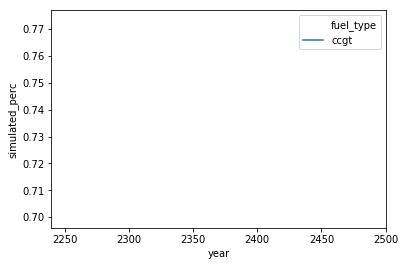

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 353)


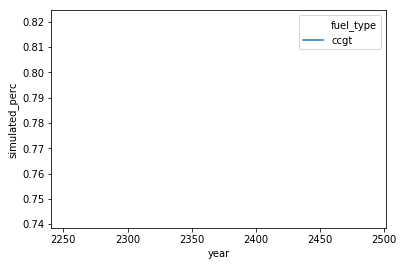

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 354)


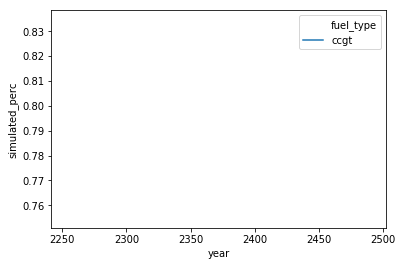

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 355)


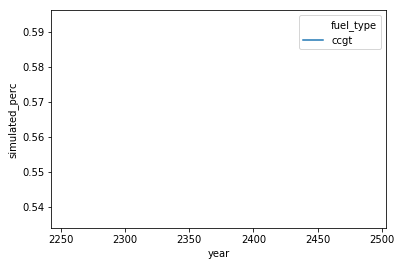

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 356)


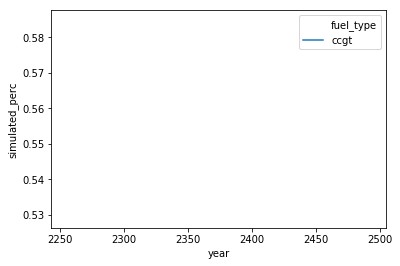

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 357)


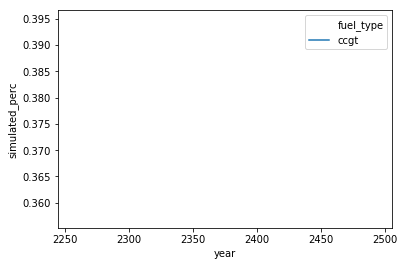

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 358)


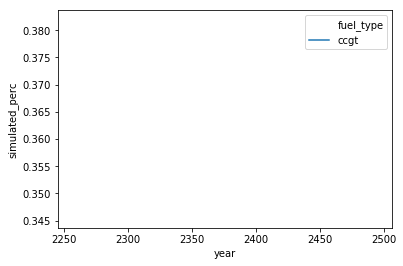

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 359)


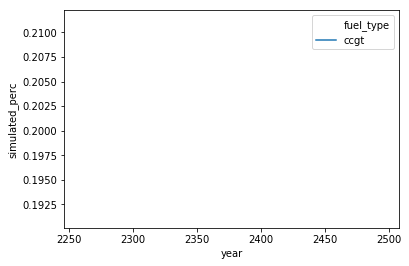

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 360)


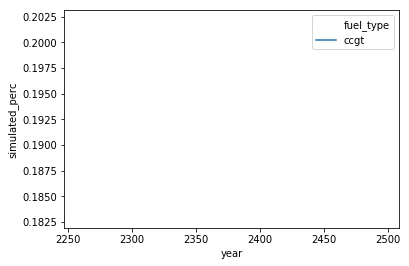

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 361)


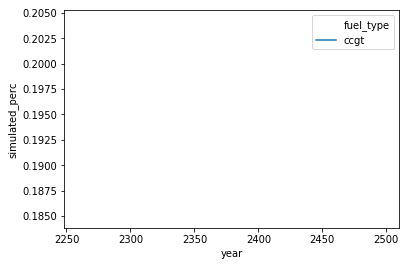

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 362)


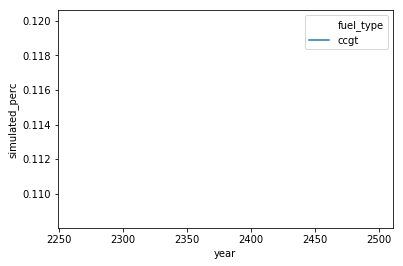

('{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}', 363)


KeyboardInterrupt: 

In [175]:
for name, df in averaged_df.groupby(averaged_df.index):
    print(name)
    sns.lineplot(data=pd.DataFrame(df), x='year', hue='fuel_type', y='simulated_perc')
    plt.show()
    plt.close()